In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import matplotlib.pyplot as plt
from qiskit.circuit import ParameterVector
import numpy as np
from qiskit.execute_function import execute
from qiskit import BasicAer
from qiskit import QuantumCircuit
import qiskit
from qiskit import Aer
# from qiskit.primitives import Sampler
from numpy.linalg import eig
from qiskit.opflow import Z, I, X, Y
from qiskit.quantum_info import Statevector, Operator, Pauli
from qiskit.circuit import Parameter
import numpy as np

C:\Users\DELL\AppData\Local\Temp\ipykernel_8788\1712027989.py:11: DeprecationWarning: The ``qiskit.opflow`` module is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  from qiskit.opflow import Z, I, X, Y


In [2]:
# import model
from CoreVQEModified import Ising_hamiltonian
# import ansatz 
from qiskit.circuit.library import RealAmplitudes, EfficientSU2
# import optimize
from CoreVQEModified import Customize_Finite_Difference, Customize_Parameter_Shift_Rule, Customize_Quantum_Natural_Gradient_Descent, Customize_SPSA, Customize_QNSPSA_PRS_blocking, Customize_QN_SPSA_blocking, Customize_QNSPSA_SPSA_blocking
#import Measurement
from CoreVQEModified import Transverse_Ising_Measurement

In [3]:
from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit.opflow.primitive_ops.pauli_sum_op import PauliSumOp
from qiskit.algorithms import NumPyEigensolver

exact_solver = NumPyEigensolver(k=1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8788\908257690.py:3: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms import NumPyEigensolver
C:\Users\DELL\AppData\Local\Temp\ipykernel_8788\908257690.py:5: DeprecationWarning: The class ``qiskit.algorithms.eigen_solvers.numpy_eigen_solver.NumPyEigensolver`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.eigensolvers.NumPyEigensolver``. See https://qisk.it/algo_migration for a migration guide.
  exact_solver = NumPyEigensolver(k=1)


In [4]:
def open_file(optimize, eta, shots, interation, ansatz_name, num_qubits, reps, entanglement, exchange_interaction, external_field, times):
    file_name_energy = f'{optimize} - LR {eta} - shots {shots} - interation {interation} - {ansatz_name}({num_qubits},{reps}) - {entanglement} - J{exchange_interaction}h{external_field} - Energy - {times+1}'
    data_file_name_energy = open(f"./energy/{file_name_energy}.txt", 'r').readlines()[2:502]

    data_output = np.zeros(len(data_file_name_energy))

    for i in range(len(data_file_name_energy)):
        data_output[i] = data_file_name_energy[i].split(' ')[0]

    return (data_output)

# Figure 1

12 qubit

In [5]:
entanglement = 'reverse_linear'
ansatz_name= "RealAmplitudes"
external_field = 2.0
CoByla_ReAm_12_500_J1h2 = open_file(optimize='COBYLA', eta=0.01, shots="None", interation=500, ansatz_name=ansatz_name, num_qubits=12, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=external_field, times=0)
FiniteDifference_ReAm_12_500_J1h2 = open_file(optimize='Customize_Finite_Difference', eta=0.01, shots="None", interation=500, ansatz_name=ansatz_name, num_qubits=12, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=external_field, times=0)
QNG_ReAm_12_500_J1h2 = open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name=ansatz_name, num_qubits=12, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=external_field, times=0)
SPSA_ReAm_12_500_J1h2 = [open_file(optimize='Customize_SPSA', eta=0.01, shots="None", interation=500, ansatz_name=ansatz_name, num_qubits=12, reps=1, exchange_interaction=1, entanglement=entanglement, external_field=external_field, times=i) for i in range(7)]
# QN_SPSA_ReAm_12_500_J1h2 = [open_file(optimize='Customize_QN_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name=ansatz_name, num_qubits=12, reps=1, exchange_interaction=1, external_field=external_field, times=i) for i in range(7)]
QNSPSA_PRS_ReAm_12_500_J1h2 = [open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name=ansatz_name, num_qubits=12, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=external_field, times=i) for i in range(7)]
QNSPSA_SPSA_ReAm_12_500_J1h2 = [open_file(optimize='Customize_QNSPSA_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name=ansatz_name, num_qubits=12, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=external_field, times=i) for i in range(7)]

# He_diag_ReAm_12_500_J1h2 = open_file(optimize='Customize_He_diagonal_PRS', eta=0.01, shots="None", interation=500, ansatz_name=ansatz_name, num_qubits=12, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=external_field, times=0)

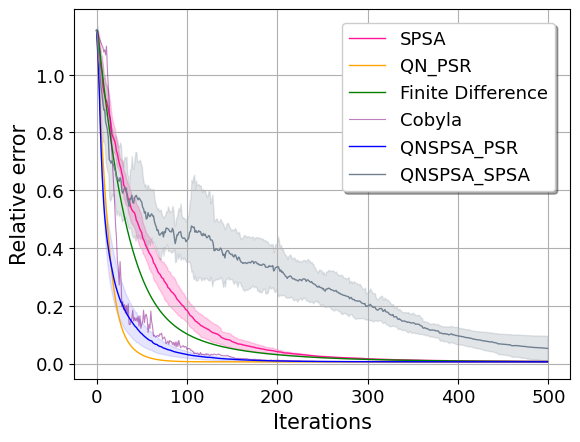

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib widget

gs_energy_12_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 2))).eigenvalues.real[0]
interation = 500

fontsize = 13

fig, ax = plt.subplots()

x = np.arange(0, interation)


mean_SPSA_ReAm_12_500_J1h2 = abs(np.mean([SPSA_ReAm_12_500_J1h2[i][0:interation] for i in range(len(SPSA_ReAm_12_500_J1h2))], axis=0) - gs_energy_12_J1_h2)/abs(gs_energy_12_J1_h2)
std_SPSA_ReAm_12_500_J1h2 = abs((np.std([SPSA_ReAm_12_500_J1h2[i][0:interation] for i in range(len(SPSA_ReAm_12_500_J1h2))], axis=0))/gs_energy_12_J1_h2)

# plt.figure(figsize=(8,5))
plt.plot(mean_SPSA_ReAm_12_500_J1h2, color='deeppink', lw=1, label='SPSA')  
plt.fill_between(x, mean_SPSA_ReAm_12_500_J1h2+std_SPSA_ReAm_12_500_J1h2, mean_SPSA_ReAm_12_500_J1h2-std_SPSA_ReAm_12_500_J1h2, color='deeppink', alpha=.2)


# mean_QN_SPSA_ReAm_12_500_J1h2 = abs(np.mean([QN_SPSA_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QN_SPSA_ReAm_12_500_J1h2))], axis=0) - gs_energy_12_J1_h2)/abs(gs_energy_12_J1_h2)
# std_QN_SPSA_ReAm_12_500_J1h2 = abs((np.std([QN_SPSA_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QN_SPSA_ReAm_12_500_J1h2))], axis=0))/gs_energy_12_J1_h2)


# plt.plot(mean_QN_SPSA_ReAm_12_500_J1h2, color='teal', lw=1, label='QN_SPSA')  
# plt.fill_between(x, mean_QN_SPSA_ReAm_12_500_J1h2+std_QN_SPSA_ReAm_12_500_J1h2, mean_QN_SPSA_ReAm_12_500_J1h2-std_QN_SPSA_ReAm_12_500_J1h2, color='teal', alpha=.2)


plt.plot(abs((QNG_ReAm_12_500_J1h2[0:interation]-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='orange', lw=1, label='QN_PSR')  
plt.plot(abs((FiniteDifference_ReAm_12_500_J1h2[0:interation]-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='green', lw=1, label='Finite Difference')
plt.plot(abs((CoByla_ReAm_12_500_J1h2[0:interation]-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='purple', lw=0.8, alpha=0.5, label='Cobyla')


mean_QNSPSA_PRS_ReAm_12_500_J1h2 = abs(np.mean([QNSPSA_PRS_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h2))], axis=0) - gs_energy_12_J1_h2)/abs(gs_energy_12_J1_h2)
std_QNSPSA_PRS_ReAm_12_500_J1h2 = abs((np.std([QNSPSA_PRS_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h2))], axis=0))/gs_energy_12_J1_h2)


plt.plot(mean_QNSPSA_PRS_ReAm_12_500_J1h2, color='blue', lw=1, label='QNSPSA_PSR')  
plt.fill_between(x, mean_QNSPSA_PRS_ReAm_12_500_J1h2+std_QNSPSA_PRS_ReAm_12_500_J1h2, mean_QNSPSA_PRS_ReAm_12_500_J1h2-std_QNSPSA_PRS_ReAm_12_500_J1h2, color='blue', alpha=.1)


mean_QNSPSA_SPSA_ReAm_12_500_J1h2 = abs(np.mean([QNSPSA_SPSA_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_SPSA_ReAm_12_500_J1h2))], axis=0) - gs_energy_12_J1_h2)/abs(gs_energy_12_J1_h2)
std_QNSPSA_SPSA_ReAm_12_500_J1h2 = abs((np.std([QNSPSA_SPSA_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_SPSA_ReAm_12_500_J1h2))], axis=0))/gs_energy_12_J1_h2)


plt.plot(mean_QNSPSA_SPSA_ReAm_12_500_J1h2, color='slategrey', lw=1, label='QNSPSA_SPSA')  
plt.fill_between(x, mean_QNSPSA_SPSA_ReAm_12_500_J1h2+std_QNSPSA_SPSA_ReAm_12_500_J1h2, mean_QNSPSA_SPSA_ReAm_12_500_J1h2-std_QNSPSA_SPSA_ReAm_12_500_J1h2, color='slategrey', alpha=.2)


# plt.plot((-He_diag_ReAm_12_500_J1h2+gs_energy_12_J1_h2)/gs_energy_12_J1_h2, color="black", lw=1, label="Hessian_diag")


plt.ylabel('Relative error', fontsize = fontsize+2)
plt.xlabel('Iterations', fontsize = fontsize+2)
# # plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=1, label="Target: " + str(gs_energy))
# # Exact ground state energy value
# # plt.axhline(y=0.001, color="silver", ls="--", lw=1, label="Target: " + str(f'{0.001}'))
# # plt.title('Quantum Natural Gradient Descent with various of learning rate')


matplotlib.rc('xtick', labelsize= fontsize) 
matplotlib.rc('ytick', labelsize= fontsize) 

# plt.xlim((-50,550))
plt.locator_params(axis="x", nbins=6)
# plt.ylim(0.0,1.2)
# plt.locator_params(axis="y", nbins=5)
plt.yticks(np.arange(0, 1.2, step=0.2))
# plt.
plt.grid()
# plt.ylim((0,0.05))
fig.legend(loc='upper center' ,bbox_to_anchor=(0.71, 0.87),  ncol=1, fancybox=True, shadow=True, fontsize=fontsize)
file_type = 'svg'
fig.savefig(f'./figure/Figure1-12-ReAm-Optimizer-Compared.{file_type}', format=file_type, dpi=600, bbox_inches='tight')

In [31]:
entanglement = 'reverse_linear'
external_field = 2.0

QNG_ReAm_12_500_J1h2 = open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplitudes", num_qubits=12, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=2.0, times=0)

QNSPSA_SPSA_MC_ReAm_12_500_J1h2 = [open_file(optimize='Customize_QNSPSA_SPSA_MonteCarlo', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplitudes", num_qubits=12, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=2.0, times=i) for i in range(7)]
QNSPSA_SPSA_ReAm_12_500_J1h2 = [open_file(optimize='Customize_QNSPSA_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplitudes", num_qubits=12, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=external_field, times=i) for i in range(7)]

QNSPSA_PRS_ReAm_12_500_J1h2 = [open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplitudes", num_qubits=12, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=external_field, times=i) for i in range(7)]
QNSPSA_PRS_MC_ReAm_12_500_J1h2 = [open_file(optimize='Customize_QNSPSA_PRS_blocking_MonteCarlo', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplitudes", num_qubits=12, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=2.0, times=i) for i in range(7)]

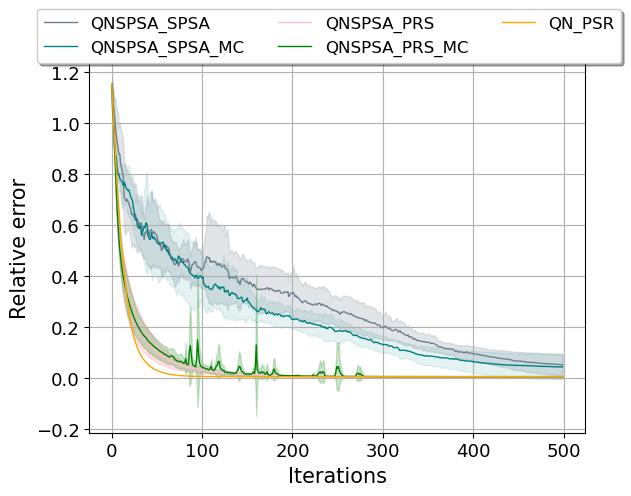

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib widget

gs_energy_12_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 2))).eigenvalues.real[0]
interation = 500

fontsize = 13

fig, ax = plt.subplots()

x = np.arange(0, interation)


mean_QNSPSA_SPSA_ReAm_12_500_J1h2 = abs(np.mean([QNSPSA_SPSA_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_SPSA_ReAm_12_500_J1h2))], axis=0) - gs_energy_12_J1_h2)/abs(gs_energy_12_J1_h2)
std_QNSPSA_SPSA_ReAm_12_500_J1h2 = abs((np.std([QNSPSA_SPSA_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_SPSA_ReAm_12_500_J1h2))], axis=0))/gs_energy_12_J1_h2)

# plt.figure(figsize=(8,5))
plt.plot(mean_QNSPSA_SPSA_ReAm_12_500_J1h2, color='slategrey', lw=1, label='QNSPSA_SPSA')  
plt.fill_between(x, mean_QNSPSA_SPSA_ReAm_12_500_J1h2+std_QNSPSA_SPSA_ReAm_12_500_J1h2, mean_QNSPSA_SPSA_ReAm_12_500_J1h2-std_QNSPSA_SPSA_ReAm_12_500_J1h2, color='slategrey', alpha=.2)


mean_QNSPSA_SPSA_MC_ReAm_12_500_J1h2 = abs(np.mean([QNSPSA_SPSA_MC_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_SPSA_MC_ReAm_12_500_J1h2))], axis=0) - gs_energy_12_J1_h2)/abs(gs_energy_12_J1_h2)
std_QNSPSA_SPSA_MC_ReAm_12_500_J1h2 = abs((np.std([QNSPSA_SPSA_MC_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_SPSA_MC_ReAm_12_500_J1h2))], axis=0))/gs_energy_12_J1_h2)

# plt.figure(figsize=(8,5))
plt.plot(mean_QNSPSA_SPSA_MC_ReAm_12_500_J1h2, color='teal', lw=1, label='QNSPSA_SPSA_MC')  
plt.fill_between(x, mean_QNSPSA_SPSA_MC_ReAm_12_500_J1h2+std_QNSPSA_SPSA_MC_ReAm_12_500_J1h2, mean_QNSPSA_SPSA_MC_ReAm_12_500_J1h2-std_QNSPSA_SPSA_MC_ReAm_12_500_J1h2, color='teal', alpha=.1)


mean_QNSPSA_PRS_ReAm_12_500_J1h2 = abs(np.mean([QNSPSA_PRS_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h2))], axis=0) - gs_energy_12_J1_h2)/abs(gs_energy_12_J1_h2)
std_QNSPSA_PRS_ReAm_12_500_J1h2 = abs((np.std([QNSPSA_PRS_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h2))], axis=0))/gs_energy_12_J1_h2)

# plt.figure(figsize=(8,5))
plt.plot(mean_QNSPSA_PRS_ReAm_12_500_J1h2, color='pink', lw=1, label='QNSPSA_PRS')  
plt.fill_between(x, mean_QNSPSA_PRS_ReAm_12_500_J1h2+std_QNSPSA_PRS_ReAm_12_500_J1h2, mean_QNSPSA_PRS_ReAm_12_500_J1h2-std_QNSPSA_PRS_ReAm_12_500_J1h2, color='pink', alpha=.5)


mean_QNSPSA_PRS_MC_ReAm_12_500_J1h2 = abs(np.mean([QNSPSA_PRS_MC_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_MC_ReAm_12_500_J1h2))], axis=0) - gs_energy_12_J1_h2)/abs(gs_energy_12_J1_h2)
std_QNSPSA_PRS_MC_ReAm_12_500_J1h2 = abs((np.std([QNSPSA_PRS_MC_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_MC_ReAm_12_500_J1h2))], axis=0))/gs_energy_12_J1_h2)

# plt.figure(figsize=(8,5))
plt.plot(mean_QNSPSA_PRS_MC_ReAm_12_500_J1h2, color='green', lw=1, label='QNSPSA_PRS_MC')  
plt.fill_between(x, mean_QNSPSA_PRS_MC_ReAm_12_500_J1h2+std_QNSPSA_PRS_MC_ReAm_12_500_J1h2, mean_QNSPSA_PRS_MC_ReAm_12_500_J1h2-std_QNSPSA_PRS_MC_ReAm_12_500_J1h2, color='green', alpha=.2)


plt.plot(abs((QNG_ReAm_12_500_J1h2[0:interation]-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='orange', lw=1, label='QN_PSR')  


plt.ylabel('Relative error', fontsize = fontsize + 2)
plt.xlabel('Iterations', fontsize = fontsize + 2)
# # plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=1, label="Target: " + str(gs_energy))
# # Exact ground state energy value
# # plt.axhline(y=0.001, color="silver", ls="--", lw=1, label="Target: " + str(f'{0.001}'))
# # plt.title('Quantum Natural Gradient Descent with various of learning rate')


matplotlib.rc('xtick', labelsize= fontsize-1) 
matplotlib.rc('ytick', labelsize= fontsize-1) 
# plt.
plt.grid()
# plt.ylim((0,0.05))
fig.legend(loc='upper center' ,bbox_to_anchor=(0.5, 1.01),  ncol=3, fancybox=True, shadow=True, fontsize=fontsize-1)

# file_type = 'svg'
# fig.savefig(f'./Figure/Figure1-12-ReAm-Optimizer-Compared.{file_type}', format=file_type, dpi=600, bbox_inches='tight')

In [6]:
entanglement = 'linear'
ansatz_name= "RealAmplitudes"
external_field = 2.0
CoByla_ReAm_12_500_J1h2 = open_file(optimize='COBYLA', eta=0.01, shots="None", interation=500, ansatz_name=ansatz_name, num_qubits=12, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=external_field, times=0)
FiniteDifference_ReAm_12_500_J1h2 = open_file(optimize='Customize_Finite_Difference', eta=0.01, shots="None", interation=500, ansatz_name=ansatz_name, num_qubits=12, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=external_field, times=0)
QNG_ReAm_12_500_J1h2 = open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name=ansatz_name, num_qubits=12, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=external_field, times=0)
SPSA_ReAm_12_500_J1h2 = [open_file(optimize='Customize_SPSA', eta=0.01, shots="None", interation=500, ansatz_name=ansatz_name, num_qubits=12, reps=1, exchange_interaction=1, entanglement=entanglement, external_field=external_field, times=i) for i in range(7)]
# QN_SPSA_ReAm_12_500_J1h2 = [open_file(optimize='Customize_QN_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name=ansatz_name, num_qubits=12, reps=1, exchange_interaction=1, external_field=external_field, times=i) for i in range(7)]
QNSPSA_PRS_ReAm_12_500_J1h2 = [open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name=ansatz_name, num_qubits=12, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=external_field, times=i) for i in range(7)]
QNSPSA_SPSA_ReAm_12_500_J1h2 = [open_file(optimize='Customize_QNSPSA_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name=ansatz_name, num_qubits=12, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=external_field, times=i) for i in range(7)]

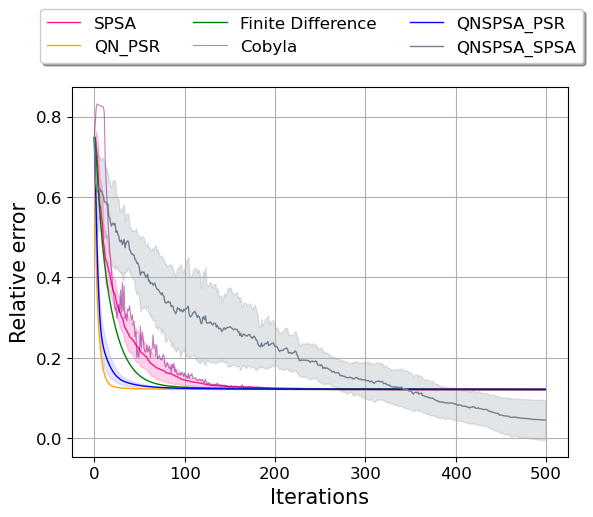

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib widget

gs_energy_12_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 2))).eigenvalues.real[0]
interation = 500

fontsize = 13

fig, ax = plt.subplots()

x = np.arange(0, interation)


mean_SPSA_ReAm_12_500_J1h2 = abs(np.mean([SPSA_ReAm_12_500_J1h2[i][0:interation] for i in range(len(SPSA_ReAm_12_500_J1h2))], axis=0) - gs_energy_12_J1_h2)/abs(gs_energy_12_J1_h2)
std_SPSA_ReAm_12_500_J1h2 = abs((np.std([SPSA_ReAm_12_500_J1h2[i][0:interation] for i in range(len(SPSA_ReAm_12_500_J1h2))], axis=0))/gs_energy_12_J1_h2)

# plt.figure(figsize=(8,5))
plt.plot(mean_SPSA_ReAm_12_500_J1h2, color='deeppink', lw=1, label='SPSA')  
plt.fill_between(x, mean_SPSA_ReAm_12_500_J1h2+std_SPSA_ReAm_12_500_J1h2, mean_SPSA_ReAm_12_500_J1h2-std_SPSA_ReAm_12_500_J1h2, color='deeppink', alpha=.2)


# mean_QN_SPSA_ReAm_12_500_J1h2 = abs(np.mean([QN_SPSA_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QN_SPSA_ReAm_12_500_J1h2))], axis=0) - gs_energy_12_J1_h2)/abs(gs_energy_12_J1_h2)
# std_QN_SPSA_ReAm_12_500_J1h2 = abs((np.std([QN_SPSA_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QN_SPSA_ReAm_12_500_J1h2))], axis=0))/gs_energy_12_J1_h2)


# plt.plot(mean_QN_SPSA_ReAm_12_500_J1h2, color='teal', lw=1, label='QN_SPSA')  
# plt.fill_between(x, mean_QN_SPSA_ReAm_12_500_J1h2+std_QN_SPSA_ReAm_12_500_J1h2, mean_QN_SPSA_ReAm_12_500_J1h2-std_QN_SPSA_ReAm_12_500_J1h2, color='teal', alpha=.2)


plt.plot(abs((QNG_ReAm_12_500_J1h2[0:interation]-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='orange', lw=1, label='QN_PSR')  
plt.plot(abs((FiniteDifference_ReAm_12_500_J1h2[0:interation]-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='green', lw=1, label='Finite Difference')
plt.plot(abs((CoByla_ReAm_12_500_J1h2[0:interation]-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='purple', lw=0.8, alpha=0.5, label='Cobyla')


mean_QNSPSA_PRS_ReAm_12_500_J1h2 = abs(np.mean([QNSPSA_PRS_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h2))], axis=0) - gs_energy_12_J1_h2)/abs(gs_energy_12_J1_h2)
std_QNSPSA_PRS_ReAm_12_500_J1h2 = abs((np.std([QNSPSA_PRS_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h2))], axis=0))/gs_energy_12_J1_h2)


plt.plot(mean_QNSPSA_PRS_ReAm_12_500_J1h2, color='blue', lw=1, label='QNSPSA_PSR')  
plt.fill_between(x, mean_QNSPSA_PRS_ReAm_12_500_J1h2+std_QNSPSA_PRS_ReAm_12_500_J1h2, mean_QNSPSA_PRS_ReAm_12_500_J1h2-std_QNSPSA_PRS_ReAm_12_500_J1h2, color='blue', alpha=.1)


mean_QNSPSA_SPSA_ReAm_12_500_J1h2 = abs(np.mean([QNSPSA_SPSA_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_SPSA_ReAm_12_500_J1h2))], axis=0) - gs_energy_12_J1_h2)/abs(gs_energy_12_J1_h2)
std_QNSPSA_SPSA_ReAm_12_500_J1h2 = abs((np.std([QNSPSA_SPSA_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_SPSA_ReAm_12_500_J1h2))], axis=0))/gs_energy_12_J1_h2)


plt.plot(mean_QNSPSA_SPSA_ReAm_12_500_J1h2, color='slategrey', lw=1, label='QNSPSA_SPSA')  
plt.fill_between(x, mean_QNSPSA_SPSA_ReAm_12_500_J1h2+std_QNSPSA_SPSA_ReAm_12_500_J1h2, mean_QNSPSA_SPSA_ReAm_12_500_J1h2-std_QNSPSA_SPSA_ReAm_12_500_J1h2, color='slategrey', alpha=.2)


plt.ylabel('Relative error', fontsize = fontsize + 2)
plt.xlabel('Iterations', fontsize = fontsize + 2)
# # plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=1, label="Target: " + str(gs_energy))
# # Exact ground state energy value
# # plt.axhline(y=0.001, color="silver", ls="--", lw=1, label="Target: " + str(f'{0.001}'))
# # plt.title('Quantum Natural Gradient Descent with various of learning rate')


matplotlib.rc('xtick', labelsize= fontsize-1) 
matplotlib.rc('ytick', labelsize= fontsize-1) 
# plt.
plt.grid(zorder=-10)
# plt.ylim((0,0.05))
fig.legend(loc='upper center' ,bbox_to_anchor=(0.5, 1.06),  ncol=3, fancybox=True, shadow=True, fontsize=fontsize-1)
fig.savefig('./figure/Figure1-12-ReAm-Optimizer-Compared.png', format='png', dpi=600, bbox_inches='tight')

# Figure 2

12 qubit

In [17]:
entanglement = 'reverse_linear'
external_field = 2.0

CoByla_ReAm_12_500_J1h2 = open_file(optimize='COBYLA', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplitudes", num_qubits=12, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=external_field, times=0)
QNG_ReAm_12_500_J1h2 = open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplitudes", num_qubits=12, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=external_field, times=0)
CoByla_SU2_12_500_J1h2 = open_file(optimize='COBYLA', eta=0.01, shots="None", interation=500, ansatz_name="EfficientSU2", num_qubits=12, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=external_field, times=0)
QNG_SU2_12_500_J1h2 = open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="EfficientSU2", num_qubits=12, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=external_field, times=0)
QNSPSA_PRS_ReAm_12_500_J1h2 = np.array([open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplitudes", num_qubits=12, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=external_field, times=i) for i in range(7)])
QNSPSA_PRS_SU2_12_500_J1h2 = np.array([open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="EfficientSU2", num_qubits=12, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=external_field, times=i) for i in range(7)])

QNSPSA_SPSA_ReAm_12_500_J1h2 = [open_file(optimize='Customize_QNSPSA_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplitudes", num_qubits=12, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=external_field, times=i) for i in range(7)]
QNSPSA_SPSA_SU2_12_500_J1h2 = [open_file(optimize='Customize_QNSPSA_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="EfficientSU2", num_qubits=12, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=external_field, times=i) for i in range(7)]

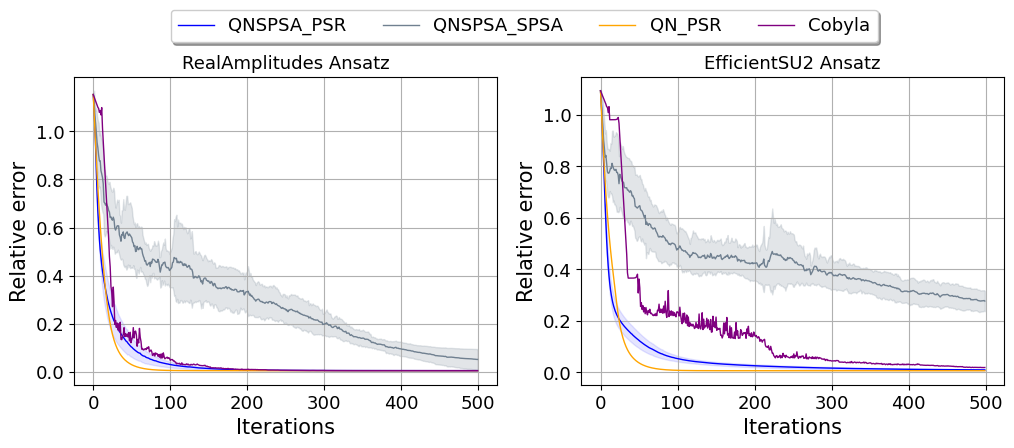

In [118]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib widget

fontsize = 13

gs_energy_12_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 2))).eigenvalues.real[0]
interation = 500

fig, (ax0,ax1) = plt.subplots(1,2, gridspec_kw={'width_ratios': [4, 4]}, figsize=(12,4))

x = np.arange(0, interation)

mean_QNSPSA_PRS_ReAm_12_500_J1h2 = abs(np.mean([QNSPSA_PRS_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h2))], axis=0) - gs_energy_12_J1_h2)/abs(gs_energy_12_J1_h2)
std_QNSPSA_PRS_ReAm_12_500_J1h2 = abs((np.std([QNSPSA_PRS_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h2))], axis=0))/gs_energy_12_J1_h2)


ax0.plot(mean_QNSPSA_PRS_ReAm_12_500_J1h2, color='blue', lw=1, label='QNSPSA_PSR')  
ax0.fill_between(x, mean_QNSPSA_PRS_ReAm_12_500_J1h2+std_QNSPSA_PRS_ReAm_12_500_J1h2, mean_QNSPSA_PRS_ReAm_12_500_J1h2-std_QNSPSA_PRS_ReAm_12_500_J1h2, color='blue', alpha=.1)


mean_QNSPSA_SPSA_ReAm_12_500_J1h2 = abs(np.mean([QNSPSA_SPSA_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_SPSA_ReAm_12_500_J1h2))], axis=0) - gs_energy_12_J1_h2)/abs(gs_energy_12_J1_h2)
std_QNSPSA_SPSA_ReAm_12_500_J1h2 = abs((np.std([QNSPSA_SPSA_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_SPSA_ReAm_12_500_J1h2))], axis=0))/gs_energy_12_J1_h2)

ax0.plot(mean_QNSPSA_SPSA_ReAm_12_500_J1h2, color='slategrey', lw=1, label='QNSPSA_SPSA')  
ax0.fill_between(x, mean_QNSPSA_SPSA_ReAm_12_500_J1h2+std_QNSPSA_SPSA_ReAm_12_500_J1h2, mean_QNSPSA_SPSA_ReAm_12_500_J1h2-std_QNSPSA_SPSA_ReAm_12_500_J1h2, color='slategrey', alpha=.2)

ax0.plot(abs((QNG_ReAm_12_500_J1h2-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='orange', lw=1, label='QN_PSR')  
ax0.plot(abs((CoByla_ReAm_12_500_J1h2-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='purple', lw=1, alpha=1, label='Cobyla')  


mean_QNSPSA_PRS_SU2_12_500_J1h2 = abs(np.mean([QNSPSA_PRS_SU2_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_SU2_12_500_J1h2))], axis=0) - gs_energy_12_J1_h2)/abs(gs_energy_12_J1_h2)
std_QNSPSA_PRS_SU2_12_500_J1h2 = abs((np.std([QNSPSA_PRS_SU2_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_SU2_12_500_J1h2))], axis=0))/gs_energy_12_J1_h2)


ax1.plot(mean_QNSPSA_PRS_SU2_12_500_J1h2, color='blue', lw=1)  
ax1.fill_between(x, mean_QNSPSA_PRS_SU2_12_500_J1h2+std_QNSPSA_PRS_SU2_12_500_J1h2, mean_QNSPSA_PRS_SU2_12_500_J1h2-std_QNSPSA_PRS_SU2_12_500_J1h2, color='blue', alpha=.1)


mean_QNSPSA_SPSA_SU2_12_500_J1h2 = abs(np.mean([QNSPSA_SPSA_SU2_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_SPSA_SU2_12_500_J1h2))], axis=0) - gs_energy_12_J1_h2)/abs(gs_energy_12_J1_h2)
std_QNSPSA_SPSA_SU2_12_500_J1h2 = abs((np.std([QNSPSA_SPSA_SU2_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_SPSA_SU2_12_500_J1h2))], axis=0))/gs_energy_12_J1_h2)


ax1.plot(mean_QNSPSA_SPSA_SU2_12_500_J1h2, color='slategrey', lw=1)  
ax1.fill_between(x, mean_QNSPSA_SPSA_SU2_12_500_J1h2+std_QNSPSA_SPSA_SU2_12_500_J1h2, mean_QNSPSA_SPSA_SU2_12_500_J1h2-std_QNSPSA_SPSA_SU2_12_500_J1h2, color='slategrey', alpha=.2)

ax1.plot(abs((QNG_SU2_12_500_J1h2-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='orange', lw=1) #, label='QN_PRS - EffcientSU2')  
ax1.plot(abs((CoByla_SU2_12_500_J1h2-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='purple', lw=1, alpha=1) #, label='Cobyla - EffcientSU2')  
# plt.yscale('log')
ax0.set_ylabel('Relative error', fontsize=fontsize+2)
ax0.set_xlabel('Iterations', fontsize=fontsize+2)
ax1.set_ylabel('Relative error', fontsize=fontsize+2)
ax1.set_xlabel('Iterations', fontsize=fontsize+2)
ax0.set_title('RealAmplitudes Ansatz', fontsize=fontsize)
ax1.set_title('EfficientSU2 Ansatz', fontsize=fontsize)
ax0.set_yticks(np.arange(0, 1.2, step=0.2))
ax1.locator_params(axis="both", nbins=6)
# plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=1, label="Target: " + str(gs_energy))
# Exact ground state energy value
# plt.axhline(y=0.001, color="silver", ls="--", lw=1, label="Target: " + str(f'{0.001}'))
# plt.title('Quantum Natural Gradient Descent with various of learning rate')


ax0.grid()
ax1.grid()
matplotlib.rc('xtick', labelsize=fontsize) 
matplotlib.rc('ytick', labelsize=fontsize) 
# plt.ylim((0,0.05))
# fig.tight_layout(pad=3.0)
fig.legend(loc='upper center' ,bbox_to_anchor=(0.5, 1.07),  ncol=4, fancybox=True, shadow=True, fontsize=fontsize)
# plt.title("Figure 2: Compare Reamplitudes and EffcientSU2 ansatz", y = -1)
file_type = 'svg'
fig.savefig(f'./Figure/Figure2 - 12 -Compared ReAm and EffSU2.{file_type}', format=file_type, dpi=600, bbox_inches='tight')

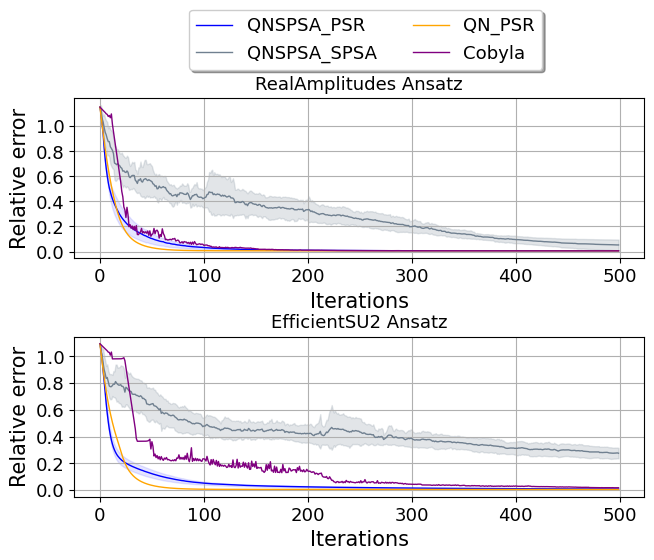

In [30]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib widget

fontsize = 13

gs_energy_12_J1_h2 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 2))).eigenvalues.real[0]
interation = 500

fig, (ax0,ax1) = plt.subplots(2,1, gridspec_kw={'height_ratios': [4, 4]})

x = np.arange(0, interation)

mean_QNSPSA_PRS_ReAm_12_500_J1h2 = abs(np.mean([QNSPSA_PRS_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h2))], axis=0) - gs_energy_12_J1_h2)/abs(gs_energy_12_J1_h2)
std_QNSPSA_PRS_ReAm_12_500_J1h2 = abs((np.std([QNSPSA_PRS_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_ReAm_12_500_J1h2))], axis=0))/gs_energy_12_J1_h2)


ax0.plot(mean_QNSPSA_PRS_ReAm_12_500_J1h2, color='blue', lw=1, label='QNSPSA_PSR')  
ax0.fill_between(x, mean_QNSPSA_PRS_ReAm_12_500_J1h2+std_QNSPSA_PRS_ReAm_12_500_J1h2, mean_QNSPSA_PRS_ReAm_12_500_J1h2-std_QNSPSA_PRS_ReAm_12_500_J1h2, color='blue', alpha=.1)


mean_QNSPSA_SPSA_ReAm_12_500_J1h2 = abs(np.mean([QNSPSA_SPSA_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_SPSA_ReAm_12_500_J1h2))], axis=0) - gs_energy_12_J1_h2)/abs(gs_energy_12_J1_h2)
std_QNSPSA_SPSA_ReAm_12_500_J1h2 = abs((np.std([QNSPSA_SPSA_ReAm_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_SPSA_ReAm_12_500_J1h2))], axis=0))/gs_energy_12_J1_h2)

ax0.plot(mean_QNSPSA_SPSA_ReAm_12_500_J1h2, color='slategrey', lw=1, label='QNSPSA_SPSA')  
ax0.fill_between(x, mean_QNSPSA_SPSA_ReAm_12_500_J1h2+std_QNSPSA_SPSA_ReAm_12_500_J1h2, mean_QNSPSA_SPSA_ReAm_12_500_J1h2-std_QNSPSA_SPSA_ReAm_12_500_J1h2, color='slategrey', alpha=.2)

ax0.plot(abs((QNG_ReAm_12_500_J1h2-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='orange', lw=1, label='QN_PSR')  
ax0.plot(abs((CoByla_ReAm_12_500_J1h2-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='purple', lw=1, alpha=1, label='Cobyla')  


mean_QNSPSA_PRS_SU2_12_500_J1h2 = abs(np.mean([QNSPSA_PRS_SU2_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_SU2_12_500_J1h2))], axis=0) - gs_energy_12_J1_h2)/abs(gs_energy_12_J1_h2)
std_QNSPSA_PRS_SU2_12_500_J1h2 = abs((np.std([QNSPSA_PRS_SU2_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_PRS_SU2_12_500_J1h2))], axis=0))/gs_energy_12_J1_h2)


ax1.plot(mean_QNSPSA_PRS_SU2_12_500_J1h2, color='blue', lw=1)  
ax1.fill_between(x, mean_QNSPSA_PRS_SU2_12_500_J1h2+std_QNSPSA_PRS_SU2_12_500_J1h2, mean_QNSPSA_PRS_SU2_12_500_J1h2-std_QNSPSA_PRS_SU2_12_500_J1h2, color='blue', alpha=.1)


mean_QNSPSA_SPSA_SU2_12_500_J1h2 = abs(np.mean([QNSPSA_SPSA_SU2_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_SPSA_SU2_12_500_J1h2))], axis=0) - gs_energy_12_J1_h2)/abs(gs_energy_12_J1_h2)
std_QNSPSA_SPSA_SU2_12_500_J1h2 = abs((np.std([QNSPSA_SPSA_SU2_12_500_J1h2[i][0:interation] for i in range(len(QNSPSA_SPSA_SU2_12_500_J1h2))], axis=0))/gs_energy_12_J1_h2)


ax1.plot(mean_QNSPSA_SPSA_SU2_12_500_J1h2, color='slategrey', lw=1)  
ax1.fill_between(x, mean_QNSPSA_SPSA_SU2_12_500_J1h2+std_QNSPSA_SPSA_SU2_12_500_J1h2, mean_QNSPSA_SPSA_SU2_12_500_J1h2-std_QNSPSA_SPSA_SU2_12_500_J1h2, color='slategrey', alpha=.2)

ax1.plot(abs((QNG_SU2_12_500_J1h2-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='orange', lw=1) #, label='QN_PRS - EffcientSU2')  
ax1.plot(abs((CoByla_SU2_12_500_J1h2-gs_energy_12_J1_h2)/gs_energy_12_J1_h2), color='purple', lw=1, alpha=1) #, label='Cobyla - EffcientSU2')  
# plt.yscale('log')
ax0.set_ylabel('Relative error', fontsize=fontsize+2)
ax0.set_xlabel('Iterations', fontsize=fontsize+2)
ax1.set_ylabel('Relative error', fontsize=fontsize+2)
ax1.set_xlabel('Iterations', fontsize=fontsize+2)
ax0.set_title('RealAmplitudes Ansatz', fontsize=fontsize)
ax1.set_title('EfficientSU2 Ansatz', fontsize=fontsize)
ax0.set_yticks(np.arange(0, 1.2, step=0.2))
ax1.locator_params(axis="both", nbins=6)
# plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=1, label="Target: " + str(gs_energy))
# Exact ground state energy value
# plt.axhline(y=0.001, color="silver", ls="--", lw=1, label="Target: " + str(f'{0.001}'))
# plt.title('Quantum Natural Gradient Descent with various of learning rate')


ax0.grid()
ax1.grid()
matplotlib.rc('xtick', labelsize=fontsize) 
matplotlib.rc('ytick', labelsize=fontsize) 
# plt.ylim((0,0.05))
# fig.tight_layout(pad=3.0)
fig.legend(loc='upper center' ,bbox_to_anchor=(0.56, 1.15),  ncol=2, fancybox=True, shadow=True, fontsize=fontsize)
# plt.title("Figure 2: Compare Reamplitudes and EffcientSU2 ansatz", y = -1)
plt.tight_layout(pad=0.2)
file_type = 'svg'
fig.savefig(f'./Figure/Figure2 - 12 -Compared ReAm and EffSU2.{file_type}', format=file_type, dpi=600, bbox_inches='tight')

# Figure 3

In [113]:
entanglement = 'reverse_linear'

gs_energy_12_J1_h0_0_2_0 = [(exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, i*0.2))).eigenvalues.real[0] for i in range(11)]

QNSPSA_PRS_ReAm_12_500_J1h0_0_2_0 = np.array([[open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplitudes", num_qubits=12, reps=1, entanglement= entanglement, exchange_interaction=1, external_field=np.round(0.2*i,1), times=j)[-1] for j in range(7)] for i in range(11)])

mean_QNSPSA_PRS_ReAm_12_500_J1h0_0_2_0 = np.array([np.abs(np.mean(QNSPSA_PRS_ReAm_12_500_J1h0_0_2_0[i], axis=0) - gs_energy_12_J1_h0_0_2_0[i])/ np.abs(gs_energy_12_J1_h0_0_2_0[i]) for i in range(len(gs_energy_12_J1_h0_0_2_0)) ])

std_QNSPSA_PRS_ReAm_12_500_J1h0_0_2_0 = np.array([np.abs(np.std(QNSPSA_PRS_ReAm_12_500_J1h0_0_2_0[i], axis=0) )/ np.abs(gs_energy_12_J1_h0_0_2_0[i]) for i in range(len(gs_energy_12_J1_h0_0_2_0)) ])


QNSPSA_SPSA_ReAm_12_500_J1h0_0_2_0 = np.array([[open_file(optimize='Customize_QNSPSA_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplitudes", num_qubits=12, reps=1, entanglement= entanglement, exchange_interaction=1, external_field=np.round(0.2*i,1), times=j)[-1] for j in range(7)] for i in range(11)])

mean_QNSPSA_SPSA_ReAm_12_500_J1h0_0_2_0 = np.array([np.abs(np.mean(QNSPSA_SPSA_ReAm_12_500_J1h0_0_2_0[i], axis=0) - gs_energy_12_J1_h0_0_2_0[i])/ np.abs(gs_energy_12_J1_h0_0_2_0[i]) for i in range(len(gs_energy_12_J1_h0_0_2_0)) ])

std_QNSPSA_SPSA_ReAm_12_500_J1h0_0_2_0 = np.array([np.abs(np.std(QNSPSA_SPSA_ReAm_12_500_J1h0_0_2_0[i], axis=0) )/ np.abs(gs_energy_12_J1_h0_0_2_0[i]) for i in range(len(gs_energy_12_J1_h0_0_2_0)) ])

QNG_ReAm_12_500_J1h0_0_2_0 = np.array([(open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplitudes", num_qubits=12, reps=1, exchange_interaction=1, entanglement=entanglement, external_field=np.round(0.0+0*0.2, 1), times=0)[-1] - gs_energy_12_J1_h0_0_2_0[0]) / np.abs(gs_energy_12_J1_h0_0_2_0[0]) for i in range(len(gs_energy_12_J1_h0_0_2_0))]) 


In [166]:
(open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplitudes", num_qubits=12, reps=1, exchange_interaction=1, entanglement=entanglement, external_field=np.round(0.0+0*0.2, 1), times=0)[-1] - gs_energy_12_J1_h0_0_2_0[0]) / np.abs(gs_energy_12_J1_h0_0_2_0[0])

0.0

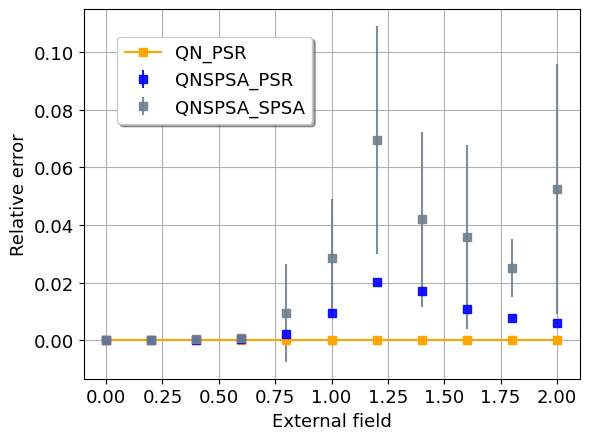

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib widget

interation = 300

fig, ax = plt.subplots()



external_field_value = np.linspace(0,2,11)

plt.errorbar(external_field_value, mean_QNSPSA_PRS_ReAm_12_500_J1h0_0_2_0, yerr = std_QNSPSA_PRS_ReAm_12_500_J1h0_0_2_0, fmt ='s', color="blue", label='QNSPSA_PSR', alpha = .9)
plt.errorbar(external_field_value, mean_QNSPSA_SPSA_ReAm_12_500_J1h0_0_2_0, yerr = std_QNSPSA_SPSA_ReAm_12_500_J1h0_0_2_0, fmt ='s', color="slategrey", label='QNSPSA_SPSA', alpha = .9)


plt.plot(external_field_value, QNG_ReAm_12_500_J1h0_0_2_0, marker='s', label='QN_PSR', color='orange')

plt.ylabel('Relative error', fontsize=fontsize)
plt.xlabel('External field', fontsize=fontsize)
# plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=1, label="Target: " + str(gs_energy))
# Exact ground state energy value
# plt.axhline(y=0.001, color="silver", ls="--", lw=1, label="Target: " + str(f'{0.001}'))
# plt.title('Quantum Natural Gradient Descent with various of learning rate')
# plt.legend(fontsize=13)

size_tick = 13
matplotlib.rc('xtick', labelsize=size_tick) 
matplotlib.rc('ytick', labelsize=size_tick) 
# plt.
plt.grid()
# plt.ylim((0,0.05))
plt.legend(loc='upper left' ,bbox_to_anchor=(0.05, 0.95),  ncol=1, fancybox=True, shadow=True, fontsize=13)
# plt.title('Figure 3: Relative Error of QNSPSA_PRS optimizer with 12 spin TIM', fontsize=13)
fig.savefig('./Figure/Figure3-12-ReAm-QNSPSA_PRS.png', format='png', dpi=600, bbox_inches='tight')

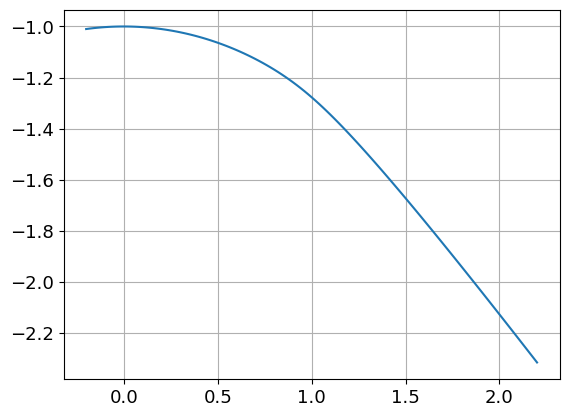

In [33]:
gs_energy_J1h_multiple = [(exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, np.round(-0.2+i*0.02,2)))).eigenvalues.real[0]/12 for i in range(121)]

import matplotlib.pyplot as plt

y = np.linspace(-0.2,2.2,121)

plt.grid()
plt.plot(y, gs_energy_J1h_multiple, "")

In [31]:
entanglement = 'reverse_linear'
QNG_ReAm_12_1_500_J1h0_0__2_0 = np.array([open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplitudes", num_qubits=12, reps=1, exchange_interaction=1, entanglement=entanglement, external_field=np.round(0.0+i*0.2, 1), times=0)[-1]/12 for i in range(11)])

QNSPSA_PRS_ReAm_12_1_500_J1h0_0__2_0 = np.array([[open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplitudes", num_qubits=12, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=np.round(0.0+i*0.2, 1), times=j)[-1] /12 for j in range(7)] for i in range(11)])
mean_QNSPSA_PRS_ReAm_12_1_500_J1h0_0__2_0 = [np.mean([QNSPSA_PRS_ReAm_12_1_500_J1h0_0__2_0[i][j] for j in range(len(QNSPSA_PRS_ReAm_12_1_500_J1h0_0__2_0[i]))], axis=0) for i in range(11)]
std_QNSPSA_PRS_ReAm_12_1_500_J1h0_0__2_0 = [np.std([QNSPSA_PRS_ReAm_12_1_500_J1h0_0__2_0[i][j] for j in range(len(QNSPSA_PRS_ReAm_12_1_500_J1h0_0__2_0[i]))], axis=0) for i in range(11)]

QNSPSA_SPSA_ReAm_12_1_500_J1h0_0__2_0 = np.array([[open_file(optimize='Customize_QNSPSA_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplitudes", num_qubits=12, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=np.round(0.0+i*0.2, 1), times=j)[-1] /12 for j in range(7)] for i in range(11)])
mean_QNSPSA_SPSA_ReAm_12_1_500_J1h0_0__2_0 = [np.mean([QNSPSA_SPSA_ReAm_12_1_500_J1h0_0__2_0[i][j] for j in range(len(QNSPSA_SPSA_ReAm_12_1_500_J1h0_0__2_0[i]))], axis=0) for i in range(11)]
std_QNSPSA_SPSA_ReAm_12_1_500_J1h0_0__2_0 = [np.std([QNSPSA_SPSA_ReAm_12_1_500_J1h0_0__2_0[i][j] for j in range(len(QNSPSA_SPSA_ReAm_12_1_500_J1h0_0__2_0[i]))], axis=0) for i in range(11)]

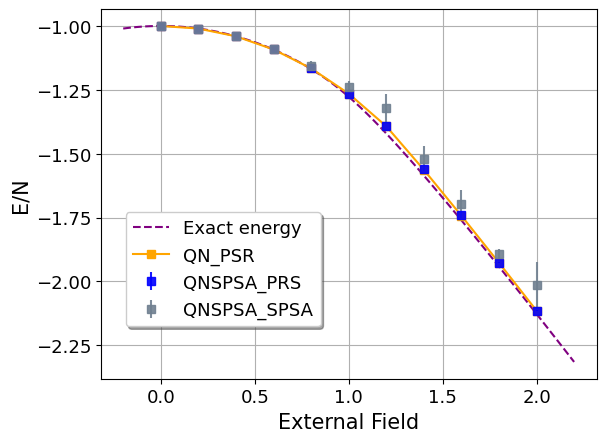

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

fontsize = 13

distance2 = np.linspace(-0.2,2.2,121)
external_field_value = np.linspace(0,2, 11)

fig, ax = plt.subplots()

plt.grid()

plt.plot(distance2 , gs_energy_J1h_multiple, "--", color='purple', label='Exact energy')
plt.plot(external_field_value, QNG_ReAm_12_1_500_J1h0_0__2_0, marker='s', label='QN_PSR', color='orange')

# plt.scatter(external_field_value, mean_QNSPSA_PRS_ReAm_12_1_500_J1h0_0__2_0,  marker='s', color='blue', alpha = 0.9, label='QNSPSA_PSR',zorder=10)

plt.errorbar(external_field_value, mean_QNSPSA_PRS_ReAm_12_1_500_J1h0_0__2_0, yerr = std_QNSPSA_PRS_ReAm_12_1_500_J1h0_0__2_0, fmt ='s', color="blue", label='QNSPSA_PRS', alpha = .9)
plt.errorbar(external_field_value, mean_QNSPSA_SPSA_ReAm_12_1_500_J1h0_0__2_0, yerr = std_QNSPSA_SPSA_ReAm_12_1_500_J1h0_0__2_0, fmt ='s', color="slategrey", label='QNSPSA_SPSA', alpha = .9)


plt.xlabel("External Field", fontsize=fontsize+2)
plt.ylabel("E/N", fontsize=fontsize+2)
matplotlib.rc('xtick', labelsize= fontsize) 
matplotlib.rc('ytick', labelsize= fontsize) 
plt.locator_params(axis="x", nbins=6)
plt.locator_params(axis="y", nbins=6)

fig.legend(loc='lower left' ,bbox_to_anchor=(0.15,0.2),  ncol=1, fancybox=True, shadow=True, fontsize=fontsize)

file_type = 'png'

fig.savefig(f'./figure/Figure3-ReAm-QNSPSA_PRS_different_externalfield.{file_type}', format=file_type, dpi=600, bbox_inches='tight')

# Figure 4

In [35]:
entanglement = 'reverse_linear'

gs_energy_multiplespin_J1_h2 = [(exact_solver.compute_eigenvalues(Ising_hamiltonian(i, 1, 2))).eigenvalues.real[0] for i in range(3,13)]

QNSPSA_PRS_ReAm_multiplespin_J1_h2 = np.array([[open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplitudes", num_qubits=i, reps=1, entanglement= entanglement, exchange_interaction=1, external_field=2.0, times=j)[-1] for j in range(7)] for i in range(3,13)])

mean_QNSPSA_PRS_ReAm_multiplespin_J1_h2 = np.array([np.abs(np.mean(QNSPSA_PRS_ReAm_multiplespin_J1_h2[i], axis=0) - gs_energy_multiplespin_J1_h2[i])/ np.abs(gs_energy_multiplespin_J1_h2[i]) for i in range(len(gs_energy_multiplespin_J1_h2)) ])

std_QNSPSA_PRS_ReAm_multiplespin_J1_h2 = np.array([np.abs(np.std(QNSPSA_PRS_ReAm_multiplespin_J1_h2[i], axis=0) )/ np.abs(gs_energy_multiplespin_J1_h2[i]) for i in range(len(gs_energy_multiplespin_J1_h2)) ])


QNSPSA_SPSA_ReAm_multiplespin_J1_h2 = np.array([[open_file(optimize='Customize_QNSPSA_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplitudes", num_qubits=i, reps=1, entanglement= entanglement, exchange_interaction=1, external_field=2.0, times=j)[-1] for j in range(7)] for i in range(3,13)])

mean_QNSPSA_SPSA_ReAm_multiplespin_J1_h2 = np.array([np.abs(np.mean(QNSPSA_SPSA_ReAm_multiplespin_J1_h2[i], axis=0) - gs_energy_multiplespin_J1_h2[i])/ np.abs(gs_energy_multiplespin_J1_h2[i]) for i in range(len(gs_energy_multiplespin_J1_h2)) ])

std_QNSPSA_SPSA_ReAm_multiplespin_J1_h2 = np.array([np.abs(np.std(QNSPSA_SPSA_ReAm_multiplespin_J1_h2[i], axis=0) )/ np.abs(gs_energy_multiplespin_J1_h2[i]) for i in range(len(gs_energy_multiplespin_J1_h2)) ])

QNG_ReAm_multiplespin_J1_h2 = np.array([np.abs(open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplitudes", num_qubits=i+3, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=2.0, times=0)[-1] - gs_energy_multiplespin_J1_h2[i]) / np.abs(gs_energy_multiplespin_J1_h2[i]) for i in range(len(gs_energy_multiplespin_J1_h2))]) 


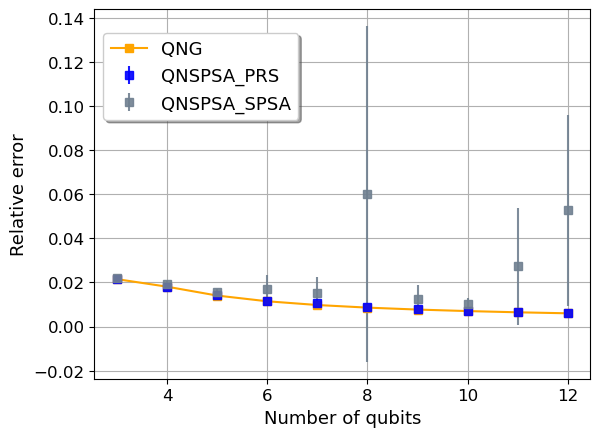

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib widget

interation = 500

fontsize = 13


fig, ax = plt.subplots()

num_spin = np.linspace(3,12,10)



plt.ylabel('Relative error', fontsize=fontsize)
plt.xlabel('Number of qubits', fontsize=fontsize)

plt.errorbar(num_spin, mean_QNSPSA_PRS_ReAm_multiplespin_J1_h2, yerr = std_QNSPSA_PRS_ReAm_multiplespin_J1_h2, fmt ='s', color="blue", label='QNSPSA_PRS', alpha = .9)
plt.errorbar(num_spin, mean_QNSPSA_SPSA_ReAm_multiplespin_J1_h2, yerr = std_QNSPSA_SPSA_ReAm_multiplespin_J1_h2, fmt ='s', color="slategrey", label='QNSPSA_SPSA', alpha = .9)


plt.plot(num_spin, QNG_ReAm_multiplespin_J1_h2, marker='s', label='QNG', color='orange')

# plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=1, label="Target: " + str(gs_energy))
# Exact ground state energy value
# plt.axhline(y=0.001, color="silver", ls="--", lw=1, label="Target: " + str(f'{0.001}'))
# plt.title('Quantum Natural Gradient Descent with various of learning rate')
# plt.legend(fontsize=13)

matplotlib.rc('xtick', labelsize=fontsize) 
matplotlib.rc('ytick', labelsize=fontsize) 
# plt.
plt.grid()
# plt.ylim((0,0.05))
plt.legend(loc='upper left' ,bbox_to_anchor=(0, 0.96),  ncol=1, fancybox=True, shadow=True, fontsize=fontsize)
# plt.title('Figure 4: Relative Error of QNSPSA_PRS optimizer with various of TIM')
fig.savefig('./Figure/Figure4-ReAm-QNSPSA_PRS_Qubit.png', format='png', dpi=600, bbox_inches='tight')

In [162]:
gs_energy_J1h2[0]*3

-6.464101615137757

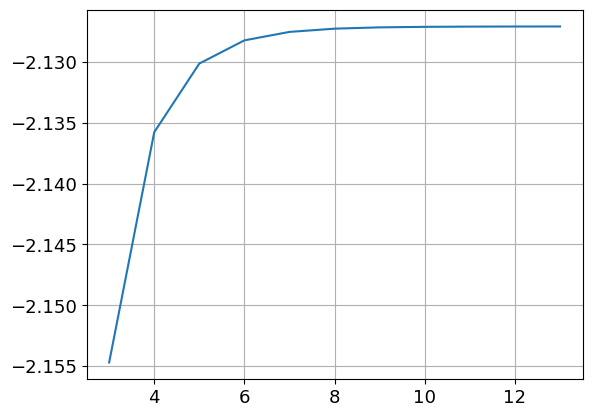

In [36]:
import matplotlib.pyplot as plt

x = np.linspace(3,13,11)

gs_energy_J1h2 = [(exact_solver.compute_eigenvalues(Ising_hamiltonian(i, 1, 2))).eigenvalues.real[0]/i for i in range(3,14)]

plt.grid()
plt.plot(x, gs_energy_J1h2, "")

In [37]:
entanglement = 'reverse_linear'

QNSPSA_PRS_ReAm_multiplespin_500_J1h2 = np.array([[open_file(optimize='Customize_QNSPSA_PRS_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplitudes", num_qubits=3+i, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=2.0, times=j)[-1]/(3+i) for j in range(7)] for i in range(10)])

mean_QNSPSA_PRS_ReAm_multiplespin_500_J1h2 = [np.mean([QNSPSA_PRS_ReAm_multiplespin_500_J1h2[i][j] for j in range(len(QNSPSA_PRS_ReAm_multiplespin_500_J1h2[i]))], axis=0) for i in range(10)]

std_QNSPSA_PRS_ReAm_multiplespin_500_J1h2 = [np.std([QNSPSA_PRS_ReAm_multiplespin_500_J1h2[i][j] for j in range(len(QNSPSA_PRS_ReAm_multiplespin_500_J1h2[i]))], axis=0) for i in range(10)]

QNG_ReAm_multiplespin_500_J1h1_2 = [open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplitudes", num_qubits=3+i, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=2.0, times=0)[-1]/(3+i) for i in range(10)]

QNSPSA_SPSA_ReAm_multiplespin_500_J1h2 = np.array([[open_file(optimize='Customize_QNSPSA_SPSA_blocking', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplitudes", num_qubits=3+i, reps=1, entanglement=entanglement, exchange_interaction=1, external_field=2.0, times=j)[-1]/(3+i) for j in range(7)] for i in range(10)])

mean_QNSPSA_SPSA_ReAm_multiplespin_500_J1h2 = [np.mean([QNSPSA_SPSA_ReAm_multiplespin_500_J1h2[i][j] for j in range(len(QNSPSA_SPSA_ReAm_multiplespin_500_J1h2[i]))], axis=0) for i in range(10)]

std_QNSPSA_SPSA_ReAm_multiplespin_500_J1h2 = [np.std([QNSPSA_SPSA_ReAm_multiplespin_500_J1h2[i][j] for j in range(len(QNSPSA_SPSA_ReAm_multiplespin_500_J1h2[i]))], axis=0) for i in range(10)]



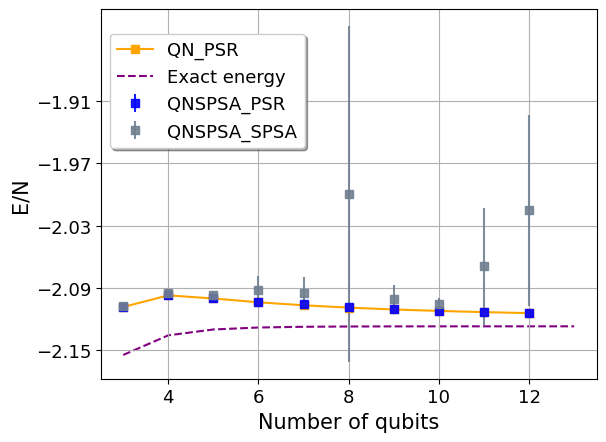

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib widget

interation = 500

fontsize = 13


fig, ax = plt.subplots()




num_spin = np.linspace(3,12,10)


# y_standard_deviation = np.array([std_QNSPSA_PRS_ReAm_3_500_J1h2[-1], std_QNSPSA_PRS_ReAm_4_500_J1h2[-1], std_QNSPSA_PRS_ReAm_5_500_J1h2[-1], std_QNSPSA_PRS_ReAm_6_500_J1h2[-1], std_QNSPSA_PRS_ReAm_7_500_J1h2[-1], std_QNSPSA_PRS_ReAm_8_500_J1h2[-1], std_QNSPSA_PRS_ReAm_9_500_J1h2[-1], std_QNSPSA_PRS_ReAm_10_500_J1h2[-1], std_QNSPSA_PRS_ReAm_11_500_J1h2[-1], std_QNSPSA_PRS_ReAm_12_500_J1h2[-1]])

plt.errorbar(num_spin, mean_QNSPSA_PRS_ReAm_multiplespin_500_J1h2, yerr = std_QNSPSA_PRS_ReAm_multiplespin_500_J1h2, fmt ='s', color='blue', label='QNSPSA_PSR', alpha = .9)

plt.errorbar(num_spin, mean_QNSPSA_SPSA_ReAm_multiplespin_500_J1h2, yerr = std_QNSPSA_SPSA_ReAm_multiplespin_500_J1h2, fmt ='s', color='slategrey', label='QNSPSA_SPSA', alpha = .9)


plt.ylabel('E/N', fontsize=fontsize+2)
plt.xlabel('Number of qubits', fontsize=fontsize+2)

plt.plot(np.linspace(3,12, 10), QNG_ReAm_multiplespin_500_J1h1_2, marker='s', label='QN_PSR', color='orange')

# plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=1, label="Target: " + str(gs_energy))
# Exact ground state energy value
# plt.axhline(y=0.001, color="silver", ls="--", lw=1, label="Target: " + str(f'{0.001}'))
# plt.title('Quantum Natural Gradient Descent with various of learning rate')
# plt.legend(fontsize=13)

# plt.
plt.grid()
# plt.ylim((0,0.05))


x = np.linspace(3,13,11)

plt.plot(x, gs_energy_J1h2, "--", color='purple', label='Exact energy', zorder=0)

matplotlib.rc('xtick', labelsize= fontsize) 
matplotlib.rc('ytick', labelsize= fontsize) 
plt.yticks(np.arange(-2.15, -1.85, step=0.06))
plt.locator_params(axis="x", nbins=6)

plt.legend(loc='lower left' ,bbox_to_anchor=(0, 0.6),  ncol=1, fancybox=True, shadow=True, fontsize=fontsize)

# plt.title('Figure 4: Relative Error of QNSPSA_PRS optimizer with various of TIM')
file_type = 'png'
fig.savefig(f'./figure/Figure4-ReAm-QNSPSA_PRS_Qubit.{file_type}', format=file_type, dpi=600, bbox_inches='tight')



plt.show()

In [126]:
-25.372416394134298 / 12

-2.1143680328445247

Compare QNG - QNSPSA_SPSA_MonteCarlo

In [162]:
gs_energy_J1_h2_external_field

[-12.0,
 -12.120303048491573,
 -12.485007649154117,
 -13.107164944918848,
 -14.021144494312807,
 -15.322595151080815,
 -17.04895935665286,
 -19.025315452324815,
 -21.126869699459927,
 -23.30187467955818,
 -25.525138302048102]

In [35]:
QNG_ReAm_12_500_J1h0 = open_file(optimize='Customize_Quantum_Natural_Gradient_Descent', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=0, times=0)
QNSPSA_SPSA_MC_ReAm_12_500_J1h0 = [open_file(optimize='Customize_QNSPSA_SPSA_MonteCarlo', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=0, times=i) for i in range(7)]
QNSPSA_PRS_MC_ReAm_12_500_J1h0 = [open_file(optimize='Customize_QNSPSA_PRS_blocking_MonteCarlo', eta=0.01, shots="None", interation=500, ansatz_name="RealAmplidues", num_qubits=12, reps=1, exchange_interaction=1, external_field=0, times=i) for i in range(7)]

In [177]:
from qiskit.primitives import Estimator, Sampler, BaseEstimator, BackendEstimator

ansatz = Customize_RealAmplidues(12,1)
initial_point = np.zeros(ansatz.num_parameters) - np.pi/4
ansatz = ansatz.bind_parameters({theta: initial_point[k] for k, theta in enumerate(ansatz.parameters)})       
for i in range(0,11):
    print(Estimator().run(ansatz, Ising_hamiltonian(12, 1,i*0.2)).result().values[0])
    print(Estimator().run(ansatz, Ising_hamiltonian(12, 1,i*0.2)).result().values[0] - gs_energy_J1_h2_external_field[i])

C:\Users\DELL\AppData\Local\Temp\ipykernel_13560\2524339332.py:5: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  ansatz = ansatz.bind_parameters({theta: initial_point[k] for k, theta in enumerate(ansatz.parameters)})


-6.196685601229372
5.803314398770628
-6.5384164129884725
5.581886635503101
-6.880147224747573
5.604860424406544
-7.2218780365066735
5.885286908412175
-7.563608848265773
6.457535646047035
-7.905339660024873
7.4172554910559425
-8.247070471783973
8.801888884868886
-8.588801283543074
10.436514168781741
-8.930532095302175
12.196337604157753
-9.272262907061275
14.029611772496903
-9.613993718820375
15.911144583227728


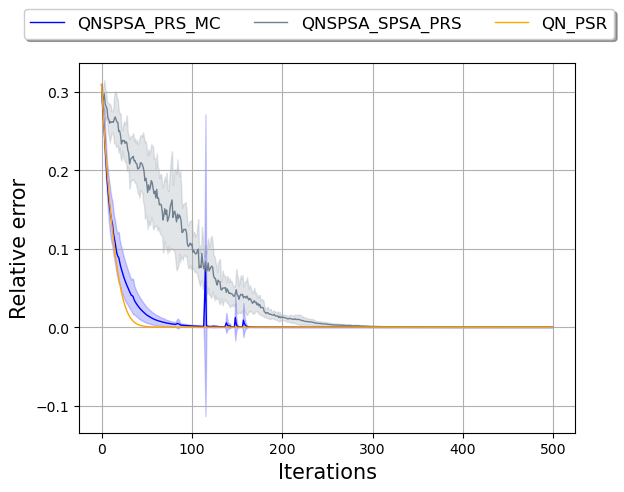

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib widget

gs_energy_12_J1_h0 = (exact_solver.compute_eigenvalues(Ising_hamiltonian(12, 1, 0))).eigenvalues.real[0]
interation = 500

fontsize = 13

fig, ax = plt.subplots()

x = np.arange(0, interation)


mean_QNSPSA_PRS_MC_ReAm_12_500_J1h0 = abs(np.mean([QNSPSA_PRS_MC_ReAm_12_500_J1h0[i][0:interation] for i in range(len(QNSPSA_PRS_MC_ReAm_12_500_J1h0))], axis=0) - gs_energy_12_J1_h0)/abs(gs_energy_12_J1_h0)
std_QNSPSA_PRS_MC_ReAm_12_500_J1h0 = abs((np.std([QNSPSA_PRS_MC_ReAm_12_500_J1h0[i][0:interation] for i in range(len(QNSPSA_PRS_MC_ReAm_12_500_J1h0))], axis=0))/gs_energy_12_J1_h0)

# plt.figure(figsize=(8,5))
plt.plot(mean_QNSPSA_PRS_MC_ReAm_12_500_J1h0, color='blue', lw=1, label='QNSPSA_PRS_MC')  
plt.fill_between(x, mean_QNSPSA_PRS_MC_ReAm_12_500_J1h0+std_QNSPSA_PRS_MC_ReAm_12_500_J1h0, mean_QNSPSA_PRS_MC_ReAm_12_500_J1h0-std_QNSPSA_PRS_MC_ReAm_12_500_J1h0, color='blue', alpha=.2)

mean_QNSPSA_SPSA_MC_ReAm_12_500_J1h0 = abs(np.mean([QNSPSA_SPSA_MC_ReAm_12_500_J1h0[i][0:interation] for i in range(len(QNSPSA_SPSA_MC_ReAm_12_500_J1h0))], axis=0) - gs_energy_12_J1_h0)/abs(gs_energy_12_J1_h0)
std_QNSPSA_SPSA_MC_ReAm_12_500_J1h0 = abs((np.std([QNSPSA_SPSA_MC_ReAm_12_500_J1h0[i][0:interation] for i in range(len(QNSPSA_SPSA_MC_ReAm_12_500_J1h0))], axis=0))/gs_energy_12_J1_h0)

# plt.figure(figsize=(8,5))
plt.plot(mean_QNSPSA_SPSA_MC_ReAm_12_500_J1h0, color='slategrey', lw=1, label='QNSPSA_SPSA_PRS')  
plt.fill_between(x, mean_QNSPSA_SPSA_MC_ReAm_12_500_J1h0+std_QNSPSA_SPSA_MC_ReAm_12_500_J1h0, mean_QNSPSA_SPSA_MC_ReAm_12_500_J1h0-std_QNSPSA_SPSA_MC_ReAm_12_500_J1h0, color='slategrey', alpha=.2)


plt.plot(abs((QNG_ReAm_12_500_J1h0[0:interation]-gs_energy_12_J1_h0)/gs_energy_12_J1_h0), color='orange', lw=1, label='QN_PSR')  


plt.ylabel('Relative error', fontsize = fontsize + 2)
plt.xlabel('Iterations', fontsize = fontsize + 2)
# # plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=1, label="Target: " + str(gs_energy))
# # Exact ground state energy value
# # plt.axhline(y=0.001, color="silver", ls="--", lw=1, label="Target: " + str(f'{0.001}'))
# # plt.title('Quantum Natural Gradient Descent with various of learning rate')


matplotlib.rc('xtick', labelsize= fontsize-1) 
matplotlib.rc('ytick', labelsize= fontsize-1) 
# plt.
plt.grid()
# plt.ylim((0,0.05))
fig.legend(loc='upper center' ,bbox_to_anchor=(0.5, 1.01),  ncol=3, fancybox=True, shadow=True, fontsize=fontsize-1)
# fig.savefig('./Figure/Figure1-12-ReAm-Optimizer-Compared.pdf', format='pdf', dpi=600, bbox_inches='tight')

In [38]:
from qiskit import QuantumCircuit
def SwapTest(circ1, circ2):
    """
    circ1: for the parameter circuit of VQD
    circ2: for the parameter circuit of VQE, this circuit have the infromation from the VQE running, or the k-1 of VQD running
    shots: number of shots
    backend: backend for running
    """

    # Perpare the circuit
    num_qubits = circ1.num_qubits
    circ = QuantumCircuit(2*num_qubits+1) # Plus one for the ancilla qubit

    circ = circ.compose(circ1, [i for i in range(1, num_qubits+1)])
    circ = circ.compose(circ2, [i for i in range(num_qubits+1, num_qubits*2+1)])
    circ.barrier()

    circ.h(0)

    for i in range(1, num_qubits+1):
        circ.cswap(0, i, i+num_qubits)

    circ.h(0)  

    overlap_value = 1 - 2*Statevector(circ).probabilities([0])[1]
    
    return overlap_value, circ

In [70]:
circuit1 = QuantumCircuit(12)
circuit1.h(_ for _ in range(12))
circuit1.cx(0, range(1,11))
circuit2 = QuantumCircuit(12)
circuit2.x(_ for _ in range(3,11))
circuit2.cx(11,range(3,10))

In [71]:
backend = Aer.get_backend('statevector_simulator')
job1 = backend.run(circuit1)
vector1 = np.matrix(job1.result().get_statevector())
job2 = backend.run(circuit2)
vector2 = np.matrix(job2.result().get_statevector())
print(vector1)
print(vector2)

[[0.015625+0.j 0.015625+0.j 0.015625+0.j ... 0.015625+0.j 0.015625+0.j
  0.015625+0.j]]
[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]


In [78]:
(np.array(vector1)[0] @ np.array(vector2)[0])**2

(0.0002441406250000001+0j)

In [75]:
value, circuit = SwapTest(circuit1, circuit2)
print(value)


0.000244140625000111


In [13]:


def Separate_Circuit_Apart(ansatz):
    # Divide the circuit to subcircuit of parameter circuit and non parameter circuit
    """
    Note that Separate circuit ansatz just works with the custom ansatz, and not work well with the qiskit ansatz
    """
    super_circuit = []
    num_unitary_operator = 0

    ansatz_barrier = 0 

    for i in range(len(ansatz)):
        if ansatz[i].operation.name == 'barrier':
            ansatz_barrier += 1


    while no_name < (ansatz.size() + ansatz_barrier):
        if ansatz[no_name].operation.params:
            sub_circuit = QuantumCircuit(ansatz.num_qubits)
            for i in range(no_name, ansatz.num_qubits + no_name):
                sub_circuit.append(ansatz[i])
            super_circuit.append(sub_circuit)
            no_name += ansatz.num_qubits 
            
        elif ansatz[no_name].operation.name == 'barrier':
            no_name += 1
            
        else:
            sub_circuit = QuantumCircuit(ansatz.num_qubits)
            
            while not ansatz[no_name].operation.params:
                if ansatz[no_name].operation.name == 'barrier':
                    no_name += 1
                    break
                sub_circuit.append(ansatz[no_name])
                no_name += 1 

                if no_name == (ansatz.size() + ansatz_barrier - 1):
                    break

            super_circuit.append(sub_circuit)
    return super_circuit


def Customize_Quantum_Natural_Gradient_Descent(operator, initial_point, learning_rate, ansatz, interation, shots, callback, sampler):
    """
    operator: The pauli operator
    parameter: the initial point that we will update until we end up with the desired point
    ansatz: the parameterized circuit that we want to update 
    """

    
    
    energy = []
    internal_initial_point = initial_point.copy()

    super_circuit = Separate_Circuit_Apart(ansatz)
    

    for i in range(interation):
        internal_ansatz = ansatz.bind_parameters({theta: internal_initial_point[k] for k, theta in enumerate(ansatz.parameters)})       
        # Measure the expectation of our hamiltonian
        internal_energy = Transverse_Ising_Measurement(operator, internal_ansatz, shots, sampler)
        energy.append(internal_energy)
        #print(internal_energy)
        #print(f'{internal_initial_point} ---------')

        if callback is not None:
            callback(internal_initial_point, internal_energy)


        fubini_study_metric = np.zeros((ansatz.num_parameters, ansatz.num_parameters))
        # Measure the fubini-study metric
        for i in range(len(super_circuit)):
            if super_circuit[i][0].operation.params:
                g_internal = [[[] for _ in range(super_circuit[i].num_parameters)] for _ in range(super_circuit[i].num_parameters)]
                internal_circuit = QuantumCircuit(super_circuit[i].num_qubits)

                parameter_previous = 0
                for j in range(i):
                    parameter_previous += super_circuit[j].num_parameters
                    internal_circuit = internal_circuit.compose(super_circuit[j])
                # print(parameter_previous)
                

                internal_circuit = internal_circuit.bind_parameters({theta: internal_initial_point[i] for i, theta in enumerate(internal_circuit.parameters)})
                
                # Add string
                string = ['I']*ansatz.num_qubits

                for l in range(super_circuit[i].num_parameters):
                    if super_circuit[i][l].operation.name == 'rx':
                        string[l] = 'X'
                    if super_circuit[i][l].operation.name == 'ry':
                        string[l] = 'Y'
                    if super_circuit[i][l].operation.name == 'rz':
                        string[l] = 'Z'

                quantum_circuit_to_meausurement = QuantumCircuit(ansatz.num_qubits)

                for l in range(len(string)):
                    if string[l] == "X":
                        quantum_circuit_to_meausurement.h(l)
                    if string[l] == "Y":
                        quantum_circuit_to_meausurement.rx(np.pi/2, l)
                    
                
                quantum_circuit = internal_circuit.compose(quantum_circuit_to_meausurement)
                quantum_circuit.measure_all()
                # print('string: ', string)
                # print(quantum_circuit)
                job = sampler.run(quantum_circuit, shots = shots)

                result = (job.result().quasi_dists[0].binary_probabilities())
                # print(result)
                # term 2 in fubini-study
                term2 = np.zeros(len(string))
                for l in range(super_circuit[i].num_parameters):
                    expectation_value = 0
                    position_of_non_I_gate = [(ansatz.num_qubits - 1) - l]
                    for m in range(len(result)):
                        extra_minus = 1
                        for n in range(len(position_of_non_I_gate)):
                            if (list(result.keys()))[m][position_of_non_I_gate[n]] == '1':
                                extra_minus *= -1
                        expectation_value += result[list(result.keys())[m]]*extra_minus
                    term2[l] = expectation_value

                # print('term2:', term2)
                
                
                for l in range(super_circuit[i].num_parameters):
                    for m in range(l, super_circuit[i].num_parameters):
                        if l == m:
                            fubini_study_metric[l + parameter_previous, l + parameter_previous] = (1 - term2[l]**2)/4
                        else:

                            term1_lm = 0
                            position_of_non_I_gate = [(ansatz.num_qubits - 1) - l, (ansatz.num_qubits - 1) - m]
                            for h in range(len(result)):
                                extra_minus = 1
                                for n in range(len(position_of_non_I_gate)):
                                    if (list(result.keys()))[h][position_of_non_I_gate[n]] == '1':
                                        extra_minus *= -1
                                term1_lm += result[list(result.keys())[h]]*extra_minus
                            
                            fubini_study_metric[l + parameter_previous, m + parameter_previous] = (term1_lm - term2[l]*term2[m])/4
                            fubini_study_metric[m + parameter_previous, l + parameter_previous] = fubini_study_metric[l + parameter_previous, m + parameter_previous]
                # print(fubini_study_metric)
                # print(internal_circuit)
                        


    
        # Exact Gradient of the cost function
        grad = np.zeros(ansatz.num_parameters)
        for i in range(ansatz.num_parameters):
            plus_parameter = internal_initial_point.copy()
            plus_parameter[i] += np.pi/2
            minus_parameter = internal_initial_point.copy()
            minus_parameter[i] -= np.pi/2
            grad[i] = (Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: plus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler) - Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: minus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler))/2

    
    
        print(fubini_study_metric)
        FS_metric_inv = np.linalg.pinv(fubini_study_metric)
        # print(FS_metric_inv)
        # print(grad)

        combine = learning_rate*FS_metric_inv.dot(grad)

        internal_initial_point =  np.subtract(internal_initial_point, combine)
    
    if callback is None:
        return energy

In [75]:
from qiskit.primitives import Sampler
sampler = Sampler()
shots = None
def fubini_matrix(super_circuit, ansatz, internal_initial_point):
    fubini_study_metric = np.zeros((ansatz.num_parameters, ansatz.num_parameters))
    # Measure the fubini-study metric
    for i in range(len(super_circuit)):
        if super_circuit[i][0].operation.params:
            g_internal = [[[] for _ in range(super_circuit[i].num_parameters)] for _ in range(super_circuit[i].num_parameters)]
            internal_circuit = QuantumCircuit(super_circuit[i].num_qubits)

            parameter_previous = 0
            for j in range(i):
                parameter_previous += super_circuit[j].num_parameters
                internal_circuit = internal_circuit.compose(super_circuit[j])
            # print(parameter_previous)
            

            internal_circuit = internal_circuit.bind_parameters({theta: internal_initial_point[i] for i, theta in enumerate(internal_circuit.parameters)})
            
            # Add string
            string = ['I']*ansatz.num_qubits

            for l in range(super_circuit[i].num_parameters):
                if super_circuit[i][l].operation.name == 'rx':
                    string[l] = 'X'
                if super_circuit[i][l].operation.name == 'ry':
                    string[l] = 'Y'
                if super_circuit[i][l].operation.name == 'rz':
                    string[l] = 'Z'

            quantum_circuit_to_meausurement = QuantumCircuit(ansatz.num_qubits)

            for l in range(len(string)):
                if string[l] == "X":
                    quantum_circuit_to_meausurement.h(l)
                if string[l] == "Y":
                    quantum_circuit_to_meausurement.rx(np.pi/2, l)
                
            
            quantum_circuit = internal_circuit.compose(quantum_circuit_to_meausurement)
            quantum_circuit.measure_all()
            # print('string: ', string)
            # print(quantum_circuit)
            job = sampler.run(quantum_circuit, shots = shots)

            result = (job.result().quasi_dists[0].binary_probabilities())
            # print(result)
            # term 2 in fubini-study
            term2 = np.zeros(len(string))
            for l in range(super_circuit[i].num_parameters):
                expectation_value = 0
                position_of_non_I_gate = [(ansatz.num_qubits - 1) - l]
                for m in range(len(result)):
                    extra_minus = 1
                    for n in range(len(position_of_non_I_gate)):
                        if (list(result.keys()))[m][position_of_non_I_gate[n]] == '1':
                            extra_minus *= -1
                    expectation_value += result[list(result.keys())[m]]*extra_minus
                term2[l] = expectation_value

            # print('term2:', term2)
            
            
            for l in range(super_circuit[i].num_parameters):
                for m in range(l, super_circuit[i].num_parameters):
                    if l == m:
                        fubini_study_metric[l + parameter_previous, l + parameter_previous] = (1 - term2[l]**2)/4
                    else:

                        term1_lm = 0
                        position_of_non_I_gate = [(ansatz.num_qubits - 1) - l, (ansatz.num_qubits - 1) - m]
                        for h in range(len(result)):
                            extra_minus = 1
                            for n in range(len(position_of_non_I_gate)):
                                if (list(result.keys()))[h][position_of_non_I_gate[n]] == '1':
                                    extra_minus *= -1
                            term1_lm += result[list(result.keys())[h]]*extra_minus
                        
                        fubini_study_metric[l + parameter_previous, m + parameter_previous] = (term1_lm - term2[l]*term2[m])/4
                        fubini_study_metric[m + parameter_previous, l + parameter_previous] = fubini_study_metric[l + parameter_previous, m + parameter_previous]
    
    return fubini_study_metric

In [118]:
ansatz = Customize_EfficientSU2(3,1)
super_circuit = Separate_Circuit_Apart(ansatz)
initial_point = np.zeros(ansatz.num_parameters) - 0.5
fubinit_matrix_1 = (fubini_matrix(super_circuit, ansatz, initial_point))

print(fubinit_matrix_1)

[[ 0.25        0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.25        0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.25        0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.05746221  0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.05746221  0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.05746221
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.24766201 -0.04088884 -0.00127725  0.          0.          0.        ]
 [ 0.

C:\Users\DELL\AppData\Local\Temp\ipykernel_11152\1996752545.py:19: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  internal_circuit = internal_circuit.bind_parameters({theta: internal_initial_point[i] for i, theta in enumerate(internal_circuit.parameters)})


In [116]:
fubinit_matrix_2 = fubini_stydy_metric_matrix(super_circuit, ansatz, initial_point, shots, sampler)
print(fubinit_matrix_2)

[[0.25 0.   0.  ]
 [0.   0.25 0.  ]
 [0.   0.   0.25]]


C:\Users\DELL\AppData\Local\Temp\ipykernel_11152\25662024.py:96: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  internal_circuit = internal_circuit.bind_parameters({theta: initial_point[i] for i, theta in enumerate(internal_circuit.parameters)})


In [117]:
np.linalg.norm(np.array(fubinit_matrix_2) - np.array(fubinit_matrix_1))

0.0

In [7]:
3 - 0.001

2.999

In [6]:
import numpy as np

np.linalg.norm(np.array([1,2,3]) - np.array([1,2,3+0.01]))

0.009999999999999787

# Compared fubini

In [109]:
import numpy as np
from scipy.linalg import block_diag
from qiskit.primitives import Estimator, Sampler, BaseEstimator, BackendEstimator


shots = None
sampler = Sampler()

def fubini_stydy_metric_matrix(super_circuit, ansatz, parameter, shots, sampler):
    def Measure_element_of_Fubini_Study_metric(circuit, circuit_for_measurement, i, j, shots, sampler):
        if i != j:
            term1 = ['I']*len(circuit)
            term2 = ['I']*len(circuit)
            term3 = ['I']*len(circuit)
            # print(circuit)
            # Change rotation gate to pauli gate
            # Term1
            if circuit[i].operation.name == 'rx':
                term1[i] = 'X'
                term2[i] = 'X'
            if circuit[i].operation.name == 'ry':
                term1[i] = 'Y'
                term2[i] = 'Y'
            if circuit[i].operation.name == 'rz':
                term1[i] = 'Z'
                term2[i] = 'Z'
            
            if circuit[j].operation.name == 'rx':
                term1[j] = 'X'
                term3[j] = 'X'
            if circuit[j].operation.name == 'ry':
                term1[j] = 'Y'
                term3[j] = 'Y'
            if circuit[j].operation.name == 'rz':
                term1[j] = 'Z'
                term3[j] = 'Z'

            # # Term 2
            # if circuit[i].operation.name == 'rx':
            #     term2[i] = 'X'
            # if circuit[i].operation.name == 'ry':
            #     term2[i] = 'Y'
            # if circuit[i].operation.name == 'rz':
            #     term2[i] = 'Z'

            # # Term 3
            # if circuit[j].operation.name == 'rx':
            #     term3[j] = 'X'
            # if circuit[j].operation.name == 'ry':
            #     term3[j] = 'Y'
            # if circuit[j].operation.name == 'rz':
            #     term3[j] = 'Z'
            

            term1 = ''.join(term1[::-1])
            term2 = ''.join(term2[::-1])
            term3 = ''.join(term3[::-1])

            return  (Transverse_Ising_Measurement(term1, circuit_for_measurement, shots, sampler) - Transverse_Ising_Measurement(term2, circuit_for_measurement, shots, sampler)*Transverse_Ising_Measurement(term3, circuit_for_measurement, shots, sampler))/4
        else:
            # term1 = ['I']*len(circuit)
            term2 = ['I']*len(circuit)

            if circuit[i].operation.name == 'rx':
                term2[i] = 'X'
            if circuit[i].operation.name == 'ry':
                term2[i] = 'Y'
            if circuit[i].operation.name == 'rz':
                term2[i] = 'Z'

            term2 = ''.join(term2[::-1])

            # new_gate = circuit_for_measurement.compose(new_gate)

            # return (Measurement(term1, circuit_for_measurement, shots, backend)[0] - Measurement(term2, circuit_for_measurement, shots, backend)[0].real**2)/4
            return (1 - Transverse_Ising_Measurement(term2, circuit_for_measurement, shots, sampler).real**2)/4


    
    # Caculate the Fubini_study_metric
    fubini_study_metric = np.zeros((ansatz.num_parameters, ansatz.num_parameters))
    initial_point = parameter.copy()
    # num_parameter = 0


    for i in range(len(super_circuit)):
        if super_circuit[i][0].operation.params:
            parameter_previous = 0
            internal_circuit = QuantumCircuit(ansatz.num_qubits)

            for j in range(i):
                parameter_previous += super_circuit[j].num_parameters
                internal_circuit = internal_circuit.compose(super_circuit[j])
                
            # print(internal_circuit)
            internal_circuit = internal_circuit.bind_parameters({theta: initial_point[i] for i, theta in enumerate(internal_circuit.parameters)})
            # num_parameter += super_circuit[i].num_parameters

            # print(num_parameter)
            
            for l in range(super_circuit[i].num_parameters):
                for m in range(l+1, super_circuit[i].num_parameters):
                    fubini_study_metric[l + parameter_previous][m + parameter_previous] = Measure_element_of_Fubini_Study_metric(super_circuit[i], internal_circuit, l, m, shots, sampler)
                    fubini_study_metric[m + parameter_previous][l + parameter_previous] = fubini_study_metric[l + parameter_previous][m + parameter_previous]
            for l in range(super_circuit[i].num_parameters):
                    fubini_study_metric[l + parameter_previous][l + parameter_previous] = Measure_element_of_Fubini_Study_metric   (super_circuit[i], internal_circuit, l, l, shots, sampler)
    return fubini_study_metric

In [60]:
(super_circuit[2]).draw()

┌─────────────────┐
q_0: ┤ Ry($\theta[3]$) ├
     ├─────────────────┤
q_1: ┤ Ry($\theta[4]$) ├
     ├─────────────────┤
q_2: ┤ Ry($\theta[5]$) ├
     └─────────────────┘

In [16]:
def matrix_power(matrix, coeff):
    eigen_value, eigen_vector = eig(matrix)

    diagonalize_matrix = np.linalg.pinv(eigen_vector) @ matrix @ eigen_vector

    diagonalize_matrix = np.diag(diagonalize_matrix)

    # print(len(diagonalize_matrix))
    # print(diagonalize_matrix)

    record_matrix = []

    # print(diagonalize_matrix)

    for i in range(len(eigen_vector)):
        # if diagonalize_matrix[i] == 0:
        #     record_matrix.append(0)
        #     continue
        # print(np.complex(diagonalize_matrix[i])**(0.1)) 
        
        record_matrix.append((diagonalize_matrix[i]+0j)**coeff)

    # print(f'record_matrix: {record_matrix}')

    diagonalize_matrix = np.diag(record_matrix)

    return np.array(eigen_vector @ diagonalize_matrix @ np.linalg.pinv(eigen_vector))

    
def SwapTest(circ1, circ2):
    """
    circ1: for the parameter circuit of VQD
    circ2: for the parameter circuit of VQE, this circuit have the infromation from the VQE running, or the k-1 of VQD running
    shots: number of shots
    backend: backend for running
    """

    # Perpare the circuit
    num_qubits = circ1.num_qubits
    circ = QuantumCircuit(2*num_qubits+1) # Plus one for the ancilla qubit

    circ = circ.compose(circ1, [i for i in range(1, num_qubits+1)])
    circ = circ.compose(circ2, [i for i in range(num_qubits+1, num_qubits*2+1)])
    circ.barrier()

    circ.h(0)

    for i in range(1, num_qubits+1):
        circ.cswap(0, i, i+num_qubits)

    circ.h(0)  

    overlap_value = 1 - 2*Statevector(circ).probabilities([0])[1]
    
    return overlap_value, circ

    

def Customize_QNSPSA_PRS_blocking(operator, initial_point, learning_rate, ansatz, interation, shots, callback, sampler):
    """
    operator: The pauli operator
    interation: number of interation
    initial_point: the initial point that we will update until we end up with the desired point
    ansatz: the parameterized circuit that we want to update 
    """

    beta = 0.001

    internal_initial_point = initial_point.copy()

    history_length = 5

    last_n_steps = np.zeros(history_length)

    energy = []

    regularized_fubini_matrix_previous = np.zeros((ansatz.num_parameters, ansatz.num_parameters))
    grad = np.zeros(ansatz.num_parameters)
    # first measurement outside
    internal_energy = Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: internal_initial_point[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler)
    energy.append(internal_energy)
    #print(internal_energy)
    #print(f'{internal_initial_point} ---------')
    if callback is not None:
        callback(internal_initial_point, internal_energy)
    
    last_n_steps[0] = internal_energy

    for k in range(interation-1):   
        next_energy = 0

        gradPRS = np.zeros(ansatz.num_parameters)
        for i in range(ansatz.num_parameters):
            plus_parameter = internal_initial_point.copy()
            plus_parameter[i] += np.pi/2
            minus_parameter = internal_initial_point.copy()
            minus_parameter[i] -= np.pi/2
            gradPRS[i] = (Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: plus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler) - Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: minus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler))/2
        # params = []
        # gradPRS = np.zeros(ansatz.num_parameters)

        # for i in range(ansatz.num_parameters):
        #     params.append((i, np.pi/2, 1, internal_initial_point, operator, learning_rate, ansatz, shots, sampler))

        # import concurrent.futures
        # executor = concurrent.futures.ProcessPoolExecutor()
        # gradPRS = list(executor.map(mini_derivate, params))

        # print('gradPRS: ', gradPRS)

        monte_carlo_matrix = []

        while True:    
            grad = np.zeros(ansatz.num_parameters)
            ck = 0.01
            ak = learning_rate
            # Natural Gradient Part
            random1 = np.array([np.random.choice([-1,1]) for _ in range(ansatz.num_parameters)])
            random2 = np.array([np.random.choice([-1,1]) for _ in range(ansatz.num_parameters)])
            # random1 = np.array([1.0 for _ in range(ansatz.num_parameters)])
            # random2 = np.array([-1.0 for _ in range(ansatz.num_parameters)])
            initial_plus1_plus2 = np.add(internal_initial_point, np.add(ck*random1, ck*random2))
            initial_plus1 = np.add(internal_initial_point, ck*random1)
            initial_minus1_plus2 = np.subtract(internal_initial_point, np.subtract(ck*random1, ck*random2))
            initial_minus1 = np.subtract(internal_initial_point, ck*random1)

            ansatz_initial = ansatz.bind_parameters({theta: internal_initial_point[k] for k, theta in enumerate(ansatz.parameters)})  
            ansatz_plus1_plus2 = ansatz.bind_parameters({theta: initial_plus1_plus2[k] for k, theta in enumerate(ansatz.parameters)})  
            ansatz_plus1 = ansatz.bind_parameters({theta: initial_plus1[k] for k, theta in enumerate(ansatz.parameters)})  
            ansatz_minus1_plus2 = ansatz.bind_parameters({theta: initial_minus1_plus2[k] for k, theta in enumerate(ansatz.parameters)})  
            ansatz_minus1 =  ansatz.bind_parameters({theta: initial_minus1[k] for k, theta in enumerate(ansatz.parameters)})  

            deltaF = SwapTest(ansatz_initial, ansatz_plus1_plus2)[0] - SwapTest(ansatz_initial, ansatz_plus1)[0] - SwapTest(ansatz_initial, ansatz_minus1_plus2)[0] + SwapTest(ansatz_initial, ansatz_minus1)[0]


            # print(deltaF)
            # Fubini_matrix
            fubini_matrix = -1/2*(deltaF/(2*ck**2))*(np.array(np.array([random1]).T*random2) + np.array(np.array([random2]).T*random1))/2
            
            # monte_carlo_matrix.append(fubini_matrix)
            # exponentially_smoothed_fubini  = fubini_matrix

            # Data of previous regularized study metric
            exponentially_smoothed_fubini = k/(k+1)*regularized_fubini_matrix_previous + 1/(k+1)*fubini_matrix.copy()    
            # exponentially_smoothed_fubini = k/(k+1)*regularized_fubini_matrix_previous + 1/(k+1)*np.array(np.mean(monte_carlo_matrix, axis=0)) 
            regularized_fubini_matrix = np.add(matrix_power(np.dot(exponentially_smoothed_fubini,exponentially_smoothed_fubini), 1/2).real, beta*np.identity(ansatz.num_parameters))

            # regularized_fubini_matrix_previous = regularized_fubini_matrix.copy()

            grad = ak*np.linalg.pinv(regularized_fubini_matrix).dot(gradPRS)

            
            # cập nhật tham số
            internal_initial_point_while = np.subtract(internal_initial_point, grad)
            tolerance = 2 * last_n_steps.std() if (k > history_length) else 2 * last_n_steps[:k+1].std()
            next_energy = Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: internal_initial_point_while[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler)

            #print(f'tolerance: {tolerance}')
            # print('gradPRS: ', gradPRS)
            #print(next_energy)

            if next_energy <= internal_energy + tolerance:
                break

            # if True:
                # break            

        
        regularized_fubini_matrix_previous = regularized_fubini_matrix.copy()
        
        # ghi data
        internal_initial_point = np.subtract(internal_initial_point, grad)
        internal_energy = Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: internal_initial_point[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler)
        energy.append(internal_energy)
        #print(internal_energy)
        #print(f'{internal_initial_point} ---------')
        # print(f'gradSPSA {gradSPSA}')
        # print(f'regularized_fubini_matrix: {np.linalg.pinv(regularized_fubini_matrix)}')

        if callback is not None:
            callback(internal_initial_point, internal_energy)

        last_n_steps[(k+1) % history_length] = internal_energy
    return energy

In [ ]:
def Customize_QNSPSA_PRS_blocking_MonteCarlo(operator, initial_point, learning_rate, ansatz, interation, shots, callback, sampler):
    """
    operator: The pauli operator
    interation: number of interation
    initial_point: the initial point that we will update until we end up with the desired point
    ansatz: the parameterized circuit that we want to update 
    """

    beta = 0.001

    internal_initial_point = initial_point.copy()

    history_length = 5

    last_n_steps = np.zeros(history_length)

    energy = []

    regularized_fubini_matrix_previous = np.zeros((ansatz.num_parameters, ansatz.num_parameters))
    grad = np.zeros(ansatz.num_parameters)
    # first measurement outside
    internal_energy = Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: internal_initial_point[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler)
    energy.append(internal_energy)
    #print(internal_energy)
    #print(f'{internal_initial_point} ---------')
    if callback is not None:
        callback(internal_initial_point, internal_energy)
    
    last_n_steps[0] = internal_energy

    for k in range(interation-1):   
        next_energy = 0

        # gradPRS = np.zeros(ansatz.num_parameters)
        # for i in range(ansatz.num_parameters):
        #     plus_parameter = internal_initial_point.copy()
        #     plus_parameter[i] += np.pi/2
        #     minus_parameter = internal_initial_point.copy()
        #     minus_parameter[i] -= np.pi/2
        #     gradPRS[i] = (Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: plus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler) - Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: minus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler))/2
        
        params = []
        gradPRS = np.zeros(ansatz.num_parameters)

        for i in range(ansatz.num_parameters):
            params.append((i, np.pi/2, 1, internal_initial_point, operator, learning_rate, ansatz, shots, sampler))

        import concurrent.futures
        executor = concurrent.futures.ProcessPoolExecutor()
        gradPRS = list(executor.map(mini_derivate, params))

        # print('gradPRS: ', gradPRS)

        monte_carlo_matrix = []

        while True:    
            grad = np.zeros(ansatz.num_parameters)
            ck = 0.01
            ak = learning_rate
            # Natural Gradient Part
            random1 = np.array([np.random.choice([-1,1]) for _ in range(ansatz.num_parameters)])
            random2 = np.array([np.random.choice([-1,1]) for _ in range(ansatz.num_parameters)])
            # random1 = np.array([1.0 for _ in range(ansatz.num_parameters)])
            # random2 = np.array([-1.0 for _ in range(ansatz.num_parameters)])
            initial_plus1_plus2 = np.add(internal_initial_point, np.add(ck*random1, ck*random2))
            initial_plus1 = np.add(internal_initial_point, ck*random1)
            initial_minus1_plus2 = np.subtract(internal_initial_point, np.subtract(ck*random1, ck*random2))
            initial_minus1 = np.subtract(internal_initial_point, ck*random1)

            ansatz_initial = ansatz.bind_parameters({theta: internal_initial_point[k] for k, theta in enumerate(ansatz.parameters)})  
            ansatz_plus1_plus2 = ansatz.bind_parameters({theta: initial_plus1_plus2[k] for k, theta in enumerate(ansatz.parameters)})  
            ansatz_plus1 = ansatz.bind_parameters({theta: initial_plus1[k] for k, theta in enumerate(ansatz.parameters)})  
            ansatz_minus1_plus2 = ansatz.bind_parameters({theta: initial_minus1_plus2[k] for k, theta in enumerate(ansatz.parameters)})  
            ansatz_minus1 =  ansatz.bind_parameters({theta: initial_minus1[k] for k, theta in enumerate(ansatz.parameters)})  

            deltaF = SwapTest(ansatz_initial, ansatz_plus1_plus2)[0] - SwapTest(ansatz_initial, ansatz_plus1)[0] - SwapTest(ansatz_initial, ansatz_minus1_plus2)[0] + SwapTest(ansatz_initial, ansatz_minus1)[0]


            # print(deltaF)
            # Fubini_matrix
            fubini_matrix = -1/2*(deltaF/(2*ck**2))*(np.array(np.array([random1]).T*random2) + np.array(np.array([random2]).T*random1))/2
            
            monte_carlo_matrix.append(fubini_matrix)
            # exponentially_smoothed_fubini  = fubini_matrix

            # Data of previous regularized study metric
            # exponentially_smoothed_fubini = k/(k+1)*regularized_fubini_matrix_previous + 1/(k+1)*fubini_matrix.copy()    
            exponentially_smoothed_fubini = k/(k+1)*regularized_fubini_matrix_previous + 1/(k+1)*np.array(np.mean(monte_carlo_matrix, axis=0)) 
            regularized_fubini_matrix = np.add(matrix_power(np.dot(exponentially_smoothed_fubini,exponentially_smoothed_fubini), 1/2).real, beta*np.identity(ansatz.num_parameters))

            # regularized_fubini_matrix_previous = regularized_fubini_matrix.copy()

            grad = ak*np.linalg.pinv(regularized_fubini_matrix).dot(gradPRS)

            
            # cập nhật tham số
            internal_initial_point_while = np.subtract(internal_initial_point, grad)
            tolerance = 2 * last_n_steps.std() if (k > history_length) else 2 * last_n_steps[:k+1].std()
            next_energy = Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: internal_initial_point_while[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler)

            #print(f'tolerance: {tolerance}')
            # print('gradPRS: ', gradPRS)
            #print(next_energy)

            if next_energy <= internal_energy + tolerance:
                break

            # if True:
                # break            

        
        regularized_fubini_matrix_previous = regularized_fubini_matrix.copy()
        
        # ghi data
        internal_initial_point = np.subtract(internal_initial_point, grad)
        internal_energy = Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: internal_initial_point[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler)
        energy.append(internal_energy)
        #print(internal_energy)
        #print(f'{internal_initial_point} ---------')
        # print(f'gradSPSA {gradSPSA}')
        # print(f'regularized_fubini_matrix: {np.linalg.pinv(regularized_fubini_matrix)}')

        if callback is not None:
            callback(internal_initial_point, internal_energy)

        last_n_steps[(k+1) % history_length] = internal_energy
    return energy

In [28]:
from qiskit.primitives import Sampler
num_qubits = 4
reps = 1
J = 1
h = 2
sampler = Sampler()
hamiltonian = Ising_hamiltonian(num_qubits, J, h)
ansatz = Customize_RealAmplidues(num_qubits, reps)
# ansatz_name = 'RealAmplidues'
interation = 500
initial_point = np.zeros(ansatz.num_parameters) - 0.5
eta = 0.01
shots = None

intermediate_info = {
    'parameters': [],
    'energy': [],
}
def callback(parameters, energy):
    intermediate_info['parameters'].append(parameters)
    intermediate_info['energy'].append(energy)
    print(energy)

np.random.seed(seed=0)
energy = Customize_Quantum_Natural_Gradient_Descent(hamiltonian, initial_point, eta, ansatz, interation, shots, callback, sampler)     
# interation = 2
# np.random.seed(seed=10)
# energy = Customize_QNSPSA_PRS_blocking(hamiltonian, initial_point, eta, ansatz, interation, shots, callback, sampler)        

C:\Users\DELL\AppData\Local\Temp\ipykernel_17572\1701945120.py:60: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  internal_ansatz = ansatz.bind_parameters({theta: internal_initial_point[k] for k, theta in enumerate(ansatz.parameters)})
C:\Users\DELL\AppData\Local\Temp\ipykernel_17572\1701945120.py:85: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  internal_circuit = internal_circuit.bind_parameters({theta: internal_initial_point[i] for i, theta in enumerate(internal_circuit.parameters)})
C:\Users\DELL\AppData\Local\Temp\ipykernel_17572\1701945120.py:161: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.

0.06365032690328043
[[ 2.50000000e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.50000000e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.50000000e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.50000000e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   2.50000000e-01 -5.04278350e-02 -5.03069808e-17  5.37764278e-17]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -5.04278350e-02  2.50000000e-01 -5.04278350e-02  4.33680869e-17]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -5.03069808e-17 -5.04278350e-02  2.50000000e-01  1.05183873e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00

KeyboardInterrupt: 

In [27]:
print(intermediate_info['energy'])

[0.06365032690328043, -5.355639513052648, -5.553711673937519, -5.603055240432749, -5.639041100607495, -5.6733353968069995, -5.709972798579494, -5.753025087920353, -5.80865419724527, -5.887494414903188, -6.009109912944276, -6.208969059512447, -6.540820804525569, -7.036148645270502, -7.579229579070971, -7.934984986062597, -8.08425798857917, -8.150280736664989, -8.188134933677334, -8.213230498430743, -8.231410435460685, -8.245390467391648, -8.256609936272243, -8.265910465726604, -8.273835569811443, -8.280757961470428, -8.286944490643663, -8.292586682751807, -8.297820494006658, -8.302739475726934, -8.307405487540986, -8.311857109908244, -8.316116266615047, -8.3201933075995, -8.324090894294338, -8.327807008432902, -8.331337316017784, -8.334677009767729, -8.337822213812984, -8.340770962578421, -8.34352379010891, -8.346083948496917, -8.348457315695912, -8.350652057285426, -8.352678130457788, -8.354546713161707, -8.356269636267623, -8.357858875659565, -8.359326140649703, -8.36068257257024, -8.

In [ ]:
optimizer = SLSQP(maxiter=100)
estimator = Estimator()
algorithm_globals.random_seed = 50
mapper=JordanWignerMapper()
qubit_op = mapper.map(hamiltonian)
vqe = VQE(estimator = estimator, ansatz = qc, optimizer=optimizer)
computation_value = vqe.compute_minimum_eigenvalue(qubit_op).eigenvalue.real

In [39]:
params = []
num_qubits = 12
optimizes = [Customize_Quantum_Natural_Gradient_Descent, Customize_QNSPSA_PRS_blocking]
external_field = np.linspace(0,2,11)
for k in range(7):
    for i in range(len(external_field)):
        params.append((num_qubits, round(external_field[i],1), optimizes[1], k))

for i in range(len(external_field)):
    params.append((num_qubits, round(external_field[i],1), optimizes[0], 0))

In [41]:
len(params)

88

In [40]:
for i in range(len(params)):
    print(params[i])

(12, 0.0, <function Customize_QNSPSA_PRS_blocking at 0x00000201CF6D9820>, 0)
(12, 0.2, <function Customize_QNSPSA_PRS_blocking at 0x00000201CF6D9820>, 0)
(12, 0.4, <function Customize_QNSPSA_PRS_blocking at 0x00000201CF6D9820>, 0)
(12, 0.6, <function Customize_QNSPSA_PRS_blocking at 0x00000201CF6D9820>, 0)
(12, 0.8, <function Customize_QNSPSA_PRS_blocking at 0x00000201CF6D9820>, 0)
(12, 1.0, <function Customize_QNSPSA_PRS_blocking at 0x00000201CF6D9820>, 0)
(12, 1.2, <function Customize_QNSPSA_PRS_blocking at 0x00000201CF6D9820>, 0)
(12, 1.4, <function Customize_QNSPSA_PRS_blocking at 0x00000201CF6D9820>, 0)
(12, 1.6, <function Customize_QNSPSA_PRS_blocking at 0x00000201CF6D9820>, 0)
(12, 1.8, <function Customize_QNSPSA_PRS_blocking at 0x00000201CF6D9820>, 0)
(12, 2.0, <function Customize_QNSPSA_PRS_blocking at 0x00000201CF6D9820>, 0)
(12, 0.0, <function Customize_QNSPSA_PRS_blocking at 0x00000201CF6D9820>, 1)
(12, 0.2, <function Customize_QNSPSA_PRS_blocking at 0x00000201CF6D9820>, 1)

In [15]:
from qiskit.primitives import Sampler

num_qubits = 3
reps = 1
J = 1
h = 2
sampler = Sampler()


intermediate_info = {
    'parameters': [],
    'energy': [],
}

hamiltonian = Ising_hamiltonian(num_qubits, J, h)
    
ansatz = Customize_RealAmplidues(num_qubits, reps)
ansatz_name = 'RealAmplidues'

#ansatz = Customize_EfficientSU2(num_qubits, reps)
#ansatz_name = 'EffcientSU2'

interation = 500
initial_point = np.zeros(ansatz.num_parameters) - 0.5
eta = 0.01
shots = None

def callback(parameters, energy):
    intermediate_info['parameters'].append(parameters)
    intermediate_info['energy'].append(energy)
    print(energy)


energy = Customize_QNSPSA_PRS_blocking(hamiltonian, initial_point, eta, ansatz, interation, shots, callback, sampler)        
# energy = Customize_Quantum_Natural_Gradient_Descent(hamiltonian, initial_point, eta, ansatz, interation, shots, callback, sampler)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9256\1884188991.py:80: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  internal_energy = Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: internal_initial_point[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9256\1884188991.py:98: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  gradPRS[i] = (Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: plus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler) - Transverse_Ising_Measurement(operator, ansatz.bind_p

0.6479341368878508


C:\Users\DELL\AppData\Local\Temp\ipykernel_9256\1884188991.py:127: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  ansatz_initial = ansatz.bind_parameters({theta: internal_initial_point[k] for k, theta in enumerate(ansatz.parameters)})
C:\Users\DELL\AppData\Local\Temp\ipykernel_9256\1884188991.py:128: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  ansatz_plus1_plus2 = ansatz.bind_parameters({theta: initial_plus1_plus2[k] for k, theta in enumerate(ansatz.parameters)})
C:\Users\DELL\AppData\Local\Temp\ipykernel_9256\1884188991.py:129: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_par

-1.0168652845971073
-1.2570055114328762
-1.5652597246512099
-2.0673763387954556
-2.5629886180117105
-3.4809107493140576
-4.272726531667385
-4.736442905386858
-4.839013367481208
-5.439828360071524
-5.575991790959828
-5.752121330757524
-5.872479872972061
-6.0585571146669865
-6.125007389558089
-6.155536343598754
-6.174207530092188
-6.186091070040767
-6.194234550834799
-6.201061701669934
-6.207755122966827
-6.213883583215208
-6.2197161755313575
-6.225285819932104
-6.230550495161275
-6.234961465898555
-6.223727973315016
-6.239151848810604
-6.245663692503348
-6.24553398988148
-6.238208946898752
-6.241149081565736
-6.247077776970995
-6.248684376238325
-6.252347500275942
-6.260364853145013
-6.267205618339605
-6.2712292501287115
-6.274858857147566
-6.2731777883488
-6.279064057659111
-6.281634509649997
-6.283343173395169
-6.284637335311378
-6.285674239726432
-6.286539874701445
-6.2876383361611925
-6.288617094407704
-6.289411241674373
-6.290118236476129
-6.290767337839992
-6.291339215732133
-6.29

KeyboardInterrupt: 

In [30]:
gs_energy_7_J1_h2

-14.892759299704457

In [32]:
print(intermediate_info['energy'])

[-2.0597577698762626, -4.250093227997218, -6.095293350435627, -6.913620349817891, -7.5622177382170594, -7.809238891584198, -8.06405263483767, -8.343491920801409, -8.615483143436645, -8.95942481776484, -9.30369194593013, -9.534981977832965, -9.781905510364725, -10.049440243229796, -10.282652120262854, -10.567320806380174, -10.758517022811375, -10.845595785510195, -10.927395498199559, -10.978812907091449, -11.094058630187343, -11.15657713148191, -11.20503337165528, -11.247720456929347, -11.284065566380058, -11.312043493144843, -11.337158635442544, -11.358911687654821, -11.379045499364198, -11.399435460827693, -11.418216980826987, -11.437823673828873, -11.454541274059684, -11.47034650629288, -11.485635582832508, -11.498765794369607, -11.515029807018694, -11.529636954101967, -11.543195307960822, -11.556595314311775, -11.568842700461083, -11.580123240221381, -11.590466358727042, -11.600042421290112, -11.609026643106493, -11.61746077498661, -11.625434990927841, -11.632710403836782, -11.63945

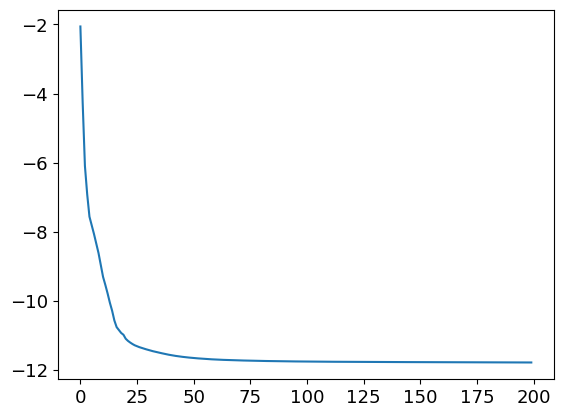

In [33]:
plt.plot(intermediate_info['energy'][0:200])

# Penny Lane

In [25]:
print(observables)

[PauliX(wires=[0]), PauliX(wires=[1]), PauliX(wires=[2]), PauliX(wires=[3]), PauliX(wires=[4]), PauliZ(wires=[0]) @ PauliZ(wires=[1]), PauliZ(wires=[1]) @ PauliZ(wires=[2]), PauliZ(wires=[2]) @ PauliZ(wires=[3]), PauliZ(wires=[3]) @ PauliZ(wires=[4]), PauliZ(wires=[0]) @ PauliZ(wires=[5])]


In [46]:
coeffs = [-2 for i in range(6)] + [-1 for i in range(5)]
observables = [qml.PauliX(i) for i in range(6)] + [qml.PauliZ(i) @ qml.PauliZ(i+1) for i in range(4)] + [qml.PauliZ(0) @ qml.PauliZ(5)]
hamiltonian = qml.Hamiltonian(coeffs, observables)
print(observables)
print(hamiltonian)

[PauliX(wires=[0]), PauliX(wires=[1]), PauliX(wires=[2]), PauliX(wires=[3]), PauliX(wires=[4]), PauliX(wires=[5]), PauliZ(wires=[0]) @ PauliZ(wires=[1]), PauliZ(wires=[1]) @ PauliZ(wires=[2]), PauliZ(wires=[2]) @ PauliZ(wires=[3]), PauliZ(wires=[3]) @ PauliZ(wires=[4]), PauliZ(wires=[0]) @ PauliZ(wires=[5])]
  (-2) [X0]
+ (-2) [X1]
+ (-2) [X2]
+ (-2) [X3]
+ (-2) [X4]
+ (-2) [X5]
+ (-1) [Z0 Z1]
+ (-1) [Z1 Z2]
+ (-1) [Z2 Z3]
+ (-1) [Z3 Z4]
+ (-1) [Z0 Z5]


In [44]:
print(Ising_hamiltonian(6,1,2))

-1.0 * ZIIIIZ
- 1.0 * ZZIIII
- 1.0 * IZZIII
- 1.0 * IIZZII
- 1.0 * IIIZZI
- 1.0 * IIIIZZ
- 2.0 * XIIIII
- 2.0 * IXIIII
- 2.0 * IIXIII
- 2.0 * IIIXII
- 2.0 * IIIIXI
- 2.0 * IIIIIX


In [18]:
coeffs = [1., 2., 3.]
observables = [qml.PauliX(0), qml.PauliZ(1), qml.PauliY(0) @ qml.PauliX(1)]
hamiltonian = qml.Hamiltonian(coeffs, observables)
print(coeffs)
print(observables)
print(hamiltonian)

[1.0, 2.0, 3.0]
[PauliX(wires=[0]), PauliZ(wires=[1]), PauliY(wires=[0]) @ PauliX(wires=[1])]
  (1.0) [X0]
+ (2.0) [Z1]
+ (3.0) [Y0 X1]


In [3]:
import pennylane as qml
# Define your Hamiltonian 
number_qubit = 3
coeffs = [-2 for i in range(number_qubit)] + [-1 for i in range(number_qubit)]
observables = [qml.PauliX(i) for i in range(number_qubit)] + [qml.PauliZ(i) @ qml.PauliZ(i+1) for i in range(number_qubit-1)] + [qml.PauliZ(0) @ qml.PauliZ(number_qubit-1)]
hamiltonian = qml.Hamiltonian(coeffs, observables)
print(hamiltonian)

  (-2) [X0]
+ (-2) [X1]
+ (-2) [X2]
+ (-1) [Z0 Z1]
+ (-1) [Z1 Z2]
+ (-1) [Z0 Z2]


In [28]:
ansatz = Customize_RealAmplidues(3,3)
ansatz.draw()

┌─────────────────┐ ░            ░ ┌─────────────────┐ ░            ░ »
q_0: ┤ Ry($\theta[0]$) ├─░───■────────░─┤ Ry($\theta[3]$) ├─░───■────────░─»
     ├─────────────────┤ ░ ┌─┴─┐      ░ ├─────────────────┤ ░ ┌─┴─┐      ░ »
q_1: ┤ Ry($\theta[1]$) ├─░─┤ X ├──■───░─┤ Ry($\theta[4]$) ├─░─┤ X ├──■───░─»
     ├─────────────────┤ ░ └───┘┌─┴─┐ ░ ├─────────────────┤ ░ └───┘┌─┴─┐ ░ »
q_2: ┤ Ry($\theta[2]$) ├─░──────┤ X ├─░─┤ Ry($\theta[5]$) ├─░──────┤ X ├─░─»
     └─────────────────┘ ░      └───┘ ░ └─────────────────┘ ░      └───┘ ░ »
«     ┌─────────────────┐ ░            ░ ┌─────────────────┐ 
«q_0: ┤ Ry($\theta[6]$) ├─░───■────────░─┤ Ry($\theta[9]$) ├─
«     ├─────────────────┤ ░ ┌─┴─┐      ░ ├─────────────────┴┐
«q_1: ┤ Ry($\theta[7]$) ├─░─┤ X ├──■───░─┤ Ry($\theta[10]$) ├
«     ├─────────────────┤ ░ └───┘┌─┴─┐ ░ ├──────────────────┤
«q_2: ┤ Ry($\theta[8]$) ├─░──────┤ X ├─░─┤ Ry($\theta[11]$) ├
«     └─────────────────┘ ░      └───┘ ░ └──────────────────┘

In [ ]:
dev = qml.device("default.qubit", wires=number_qubit)

In [52]:
import pennylane as qml
# Define your Hamiltonian 
number_qubit = 12
dev = qml.device("default.qubit", wires=number_qubit)
coeffs = [-2 for i in range(number_qubit)] + [-1 for i in range(number_qubit)]
observables = [qml.PauliX(i) for i in range(number_qubit)] + [qml.PauliZ(i) @ qml.PauliZ(i+1) for i in range(number_qubit-1)] + [qml.PauliZ(0) @ qml.PauliZ(number_qubit-1)]
hamiltonian = qml.Hamiltonian(coeffs, observables)
print(hamiltonian)

ContextualVersionConflict: (rustworkx 0.14.2 (d:\users\dell\anaconda3\lib\site-packages), Requirement.parse('rustworkx==0.12.1'), {'retworkx'})

In [8]:
vars(qml)

{'__name__': 'pennylane',
 '__doc__': '\nThis is the top level module from which all basic functions and classes of\nPennyLane can be directly imported.\n',
 '__package__': 'pennylane',
 '__loader__': <_frozen_importlib_external.SourceFileLoader at 0x1ce5c36f820>,
 '__spec__': ModuleSpec(name='pennylane', loader=<_frozen_importlib_external.SourceFileLoader object at 0x000001CE5C36F820>, origin='d:\\Users\\DELL\\anaconda3\\lib\\site-packages\\pennylane\\__init__.py', submodule_search_locations=['d:\\Users\\DELL\\anaconda3\\lib\\site-packages\\pennylane']),
 '__path__': ['d:\\Users\\DELL\\anaconda3\\lib\\site-packages\\pennylane'],
 '__file__': 'd:\\Users\\DELL\\anaconda3\\lib\\site-packages\\pennylane\\__init__.py',
 '__cached__': 'd:\\Users\\DELL\\anaconda3\\lib\\site-packages\\pennylane\\__pycache__\\__init__.cpython-38.pyc',
 '__builtins__': {'__name__': 'builtins',
  '__doc__': "Built-in functions, exceptions, and other objects.\n\nNoteworthy: None is the `nil' object; Ellipsis repr

In [5]:
import pennylane as qml
from pennylane import numpy as np

number_qubit = 12

dev = qml.device("default.qubit", wires=number_qubit)
# qml.device("qiskit_aer", wires=3)
# dev = qml.device("qiskit.aer",wires=3,backend="aer_simulator_statevector")

# Define your Hamiltonian 
coeffs = [-2 for i in range(number_qubit)] + [-1 for i in range(number_qubit)]
observables = [qml.PauliX(i) for i in range(number_qubit)] + [qml.PauliZ(i) @ qml.PauliZ(i+1) for i in range(number_qubit-1)] + [qml.PauliZ(0) @ qml.PauliZ(number_qubit-1)]
hamiltonian = qml.Hamiltonian(coeffs, observables)
print(hamiltonian)

@qml.qnode(dev, interface="autograd")
def circuit(params):
    # |psi_0>: state preparation
    number_qubit = 12
    reps = 1
    for i in range(number_qubit):
        qml.RY(params[i], wires=[i])
    
    for i in range(number_qubit):
        qml.RZ(params[i + number_qubit], wires=[i])
    
    for j in range(reps):
        # for i in range(number_qubit-1):
        #     qml.CNOT(wires=[i, i+1])

        for i in reversed(range(number_qubit-1)):
            qml.CNOT(wires=[i, i+1])
        for i in range(number_qubit):
            qml.RY(params[i+(j+2)*number_qubit], wires=[i])
        
        for i in range(number_qubit):
            qml.RZ(params[i+(j+3)*number_qubit], wires=[i])

    return qml.expval(hamiltonian)

  (-2) [X0]
+ (-2) [X1]
+ (-2) [X2]
+ (-2) [X3]
+ (-2) [X4]
+ (-2) [X5]
+ (-2) [X6]
+ (-2) [X7]
+ (-2) [X8]
+ (-2) [X9]
+ (-2) [X10]
+ (-2) [X11]
+ (-1) [Z0 Z1]
+ (-1) [Z1 Z2]
+ (-1) [Z2 Z3]
+ (-1) [Z3 Z4]
+ (-1) [Z4 Z5]
+ (-1) [Z5 Z6]
+ (-1) [Z6 Z7]
+ (-1) [Z7 Z8]
+ (-1) [Z8 Z9]
+ (-1) [Z9 Z10]
+ (-1) [Z10 Z11]
+ (-1) [Z0 Z11]


In [81]:
init_params = np.array([-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5], requires_grad=True)
print(circuit(init_params))

-1.2979030606216366


In [71]:
from qiskit.primitives  import Sampler
import numpy as np
hamiltonian = Ising_hamiltonian(6,1,2)
quantum_circuit = Customize_RealAmplidues(6,1)
initial_point = np.zeros(quantum_circuit.num_parameters) - 0.5
quantum_circuit = quantum_circuit.bind_parameters({theta: initial_point[k] for k, theta in enumerate(quantum_circuit.parameters)})    
sampler = Sampler()
print(Transverse_Ising_Measurement(hamiltonian, quantum_circuit, shots=None, sampler=sampler))

-1.297903060621635


C:\Users\DELL\AppData\Local\Temp\ipykernel_720\2343839058.py:6: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  quantum_circuit = quantum_circuit.bind_parameters({theta: initial_point[k] for k, theta in enumerate(quantum_circuit.parameters)})


In [61]:
quantum_circuit.draw()

┌─────────────────┐ ░                           ░ ┌─────────────────┐ 
q_0: ┤ Ry($\theta[0]$) ├─░───■───────────────────────░─┤ Ry($\theta[6]$) ├─
     ├─────────────────┤ ░ ┌─┴─┐                     ░ ├─────────────────┤ 
q_1: ┤ Ry($\theta[1]$) ├─░─┤ X ├──■──────────────────░─┤ Ry($\theta[7]$) ├─
     ├─────────────────┤ ░ └───┘┌─┴─┐                ░ ├─────────────────┤ 
q_2: ┤ Ry($\theta[2]$) ├─░──────┤ X ├──■─────────────░─┤ Ry($\theta[8]$) ├─
     ├─────────────────┤ ░      └───┘┌─┴─┐           ░ ├─────────────────┤ 
q_3: ┤ Ry($\theta[3]$) ├─░───────────┤ X ├──■────────░─┤ Ry($\theta[9]$) ├─
     ├─────────────────┤ ░           └───┘┌─┴─┐      ░ ├─────────────────┴┐
q_4: ┤ Ry($\theta[4]$) ├─░────────────────┤ X ├──■───░─┤ Ry($\theta[10]$) ├
     ├─────────────────┤ ░                └───┘┌─┴─┐ ░ ├──────────────────┤
q_5: ┤ Ry($\theta[5]$) ├─░─────────────────────┤ X ├─░─┤ Ry($\theta[11]$) ├
     └─────────────────┘ ░                     └───┘ ░ └──────────────────┘

In [ ]:
import numpy as np

array = np.ones((12,12))

vector = 

In [104]:
vector = np.linspace(1,12,12)
print(vector)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


C:\Users\DELL\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


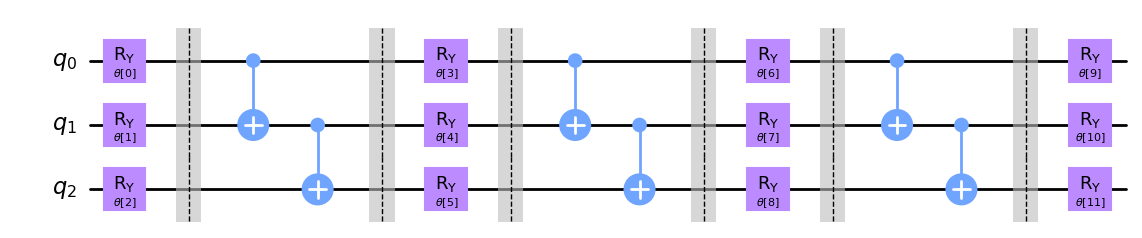

In [47]:
ansatz = Customize_RealAmplidues(3,3)
ansatz.draw('mpl')

In [55]:
ansatz.draw()

┌─────────────────┐ ░            ░ ┌─────────────────┐ ░            ░ »
q_0: ┤ Ry($\theta[0]$) ├─░───■────────░─┤ Ry($\theta[3]$) ├─░───■────────░─»
     ├─────────────────┤ ░ ┌─┴─┐      ░ ├─────────────────┤ ░ ┌─┴─┐      ░ »
q_1: ┤ Ry($\theta[1]$) ├─░─┤ X ├──■───░─┤ Ry($\theta[4]$) ├─░─┤ X ├──■───░─»
     ├─────────────────┤ ░ └───┘┌─┴─┐ ░ ├─────────────────┤ ░ └───┘┌─┴─┐ ░ »
q_2: ┤ Ry($\theta[2]$) ├─░──────┤ X ├─░─┤ Ry($\theta[5]$) ├─░──────┤ X ├─░─»
     └─────────────────┘ ░      └───┘ ░ └─────────────────┘ ░      └───┘ ░ »
«     ┌─────────────────┐ ░            ░ ┌─────────────────┐ 
«q_0: ┤ Ry($\theta[6]$) ├─░───■────────░─┤ Ry($\theta[9]$) ├─
«     ├─────────────────┤ ░ ┌─┴─┐      ░ ├─────────────────┴┐
«q_1: ┤ Ry($\theta[7]$) ├─░─┤ X ├──■───░─┤ Ry($\theta[10]$) ├
«     ├─────────────────┤ ░ └───┘┌─┴─┐ ░ ├──────────────────┤
«q_2: ┤ Ry($\theta[8]$) ├─░──────┤ X ├─░─┤ Ry($\theta[11]$) ├
«     └─────────────────┘ ░      └───┘ ░ └──────────────────┘

In [119]:
from qiskit.circuit.library import RealAmplitudes, EfficientSU2

In [128]:
ansatz = RealAmplitudes(4, 'reverse_linear',1, insert_barriers=True).decompose()

In [122]:
ansatz = EfficientSU2(4, entanglement='reverse_linear', reps=1, insert_barriers=True).decompose()
ansatz.draw()

┌──────────┐┌──────────┐ ░                 ░  ┌──────────┐┌───────────┐
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[4]) ├─░─────────────■───░──┤ Ry(θ[8]) ├┤ Rz(θ[12]) ├
     ├──────────┤├──────────┤ ░           ┌─┴─┐ ░  ├──────────┤├───────────┤
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[5]) ├─░────────■──┤ X ├─░──┤ Ry(θ[9]) ├┤ Rz(θ[13]) ├
     ├──────────┤├──────────┤ ░      ┌─┴─┐└───┘ ░ ┌┴──────────┤├───────────┤
q_2: ┤ Ry(θ[2]) ├┤ Rz(θ[6]) ├─░───■──┤ X ├──────░─┤ Ry(θ[10]) ├┤ Rz(θ[14]) ├
     ├──────────┤├──────────┤ ░ ┌─┴─┐└───┘      ░ ├───────────┤├───────────┤
q_3: ┤ Ry(θ[3]) ├┤ Rz(θ[7]) ├─░─┤ X ├───────────░─┤ Ry(θ[11]) ├┤ Rz(θ[15]) ├
     └──────────┘└──────────┘ ░ └───┘           ░ └───────────┘└───────────┘

In [123]:
import numpy as np
initial_point = np.linspace(0, ansatz.num_parameters-1, ansatz.num_parameters)
qc = ansatz.assign_parameters(initial_point)
qc.draw()

┌───────┐┌───────┐ ░                 ░ ┌───────┐ ┌────────┐
q_0: ┤ Ry(0) ├┤ Rz(4) ├─░─────────────■───░─┤ Ry(8) ├─┤ Rz(12) ├
     ├───────┤├───────┤ ░           ┌─┴─┐ ░ ├───────┤ ├────────┤
q_1: ┤ Ry(1) ├┤ Rz(5) ├─░────────■──┤ X ├─░─┤ Ry(9) ├─┤ Rz(13) ├
     ├───────┤├───────┤ ░      ┌─┴─┐└───┘ ░ ├───────┴┐├────────┤
q_2: ┤ Ry(2) ├┤ Rz(6) ├─░───■──┤ X ├──────░─┤ Ry(10) ├┤ Rz(14) ├
     ├───────┤├───────┤ ░ ┌─┴─┐└───┘      ░ ├────────┤├────────┤
q_3: ┤ Ry(3) ├┤ Rz(7) ├─░─┤ X ├───────────░─┤ Ry(11) ├┤ Rz(15) ├
     └───────┘└───────┘ ░ └───┘           ░ └────────┘└────────┘

In [132]:
def Separate_Circuit_Apart(ansatz):
    # Divide the circuit to subcircuit of parameter circuit and non parameter circuit
    """
    Note that Separate circuit ansatz just works with the custom ansatz, and not work well with the qiskit ansatz
    """
    super_circuit = []
    num_unitary_operator = 0

    ansatz_barrier = 0 

    for i in range(len(ansatz)):
        if ansatz[i].operation.name == 'barrier':
            ansatz_barrier += 1


    while num_unitary_operator < (ansatz.size() + ansatz_barrier):
        if ansatz[num_unitary_operator].operation.params:
            sub_circuit = QuantumCircuit(ansatz.num_qubits)
            for i in range(num_unitary_operator, ansatz.num_qubits + num_unitary_operator):
                sub_circuit.append(ansatz[i])
            super_circuit.append(sub_circuit)
            num_unitary_operator += ansatz.num_qubits 
            
        elif ansatz[num_unitary_operator].operation.name == 'barrier':
            num_unitary_operator += 1
            
        else:
            sub_circuit = QuantumCircuit(ansatz.num_qubits)
            
            while not ansatz[num_unitary_operator].operation.params:
                if ansatz[num_unitary_operator].operation.name == 'barrier':
                    num_unitary_operator += 1
                    break
                sub_circuit.append(ansatz[num_unitary_operator])
                num_unitary_operator += 1 

                if num_unitary_operator == (ansatz.size() + ansatz_barrier - 1):
                    break

            super_circuit.append(sub_circuit)
            
    return super_circuit

In [256]:
ansatz = RealAmplitudes(4, 'reverse_linear',1, insert_barriers=True).decompose()

In [134]:
ansatz = EfficientSU2(4, entanglement='reverse_linear', reps=1, insert_barriers=True).decompose()

In [137]:
import numpy as np
initial_point = np.linspace(0, ansatz.num_parameters-1, ansatz.num_parameters)
qc = ansatz.assign_parameters(initial_point)
qc.draw()

┌───────┐┌───────┐ ░                 ░ ┌───────┐ ┌────────┐
q_0: ┤ Ry(0) ├┤ Rz(4) ├─░─────────────■───░─┤ Ry(8) ├─┤ Rz(12) ├
     ├───────┤├───────┤ ░           ┌─┴─┐ ░ ├───────┤ ├────────┤
q_1: ┤ Ry(1) ├┤ Rz(5) ├─░────────■──┤ X ├─░─┤ Ry(9) ├─┤ Rz(13) ├
     ├───────┤├───────┤ ░      ┌─┴─┐└───┘ ░ ├───────┴┐├────────┤
q_2: ┤ Ry(2) ├┤ Rz(6) ├─░───■──┤ X ├──────░─┤ Ry(10) ├┤ Rz(14) ├
     ├───────┤├───────┤ ░ ┌─┴─┐└───┘      ░ ├────────┤├────────┤
q_3: ┤ Ry(3) ├┤ Rz(7) ├─░─┤ X ├───────────░─┤ Ry(11) ├┤ Rz(15) ├
     └───────┘└───────┘ ░ └───┘           ░ └────────┘└────────┘

In [94]:
def Customize_EfficientSU2(number_qubits, number_of_subcircuit):
    """
    number_qubits: The amounts of qubits in out system
    number_of_subcircuit: The amounts of subcuirt for parameterized our system
    su2gate: is the gate we want to parameterized with
    insert_barriers: add barriers in our circuit for nice looking
    The function will return the circuit having the parameter and we can update these parameter in our code
    """
    circuit = QuantumCircuit(number_qubits)

    theta = ParameterVector(r'$\theta$', number_qubits*2 + number_of_subcircuit*number_qubits*2)


    # Use for the 1-qubit case
    if number_qubits == 1:
        theta1 = Parameter(theta[0])
        circuit.ry(theta1, 0)
        theta2 = Parameter(theta[1])
        circuit.rz(theta2, 0)
        circuit.barrier()

        for i in range(number_of_subcircuit):
            theta1 = Parameter(theta[2*i+2])
            circuit.ry(theta1, 0)
            theta2 = Parameter(theta[2*i+3])
            circuit.rz(theta2, 0)

            if i != number_of_subcircuit - 1:
                circuit.barrier()

        return circuit


    def add_subcircuit(circuit, stop_barrier):
        sub_circuit = QuantumCircuit(number_qubits)
        number_parameter = circuit.num_parameters

        sub_circuit.barrier()

        # sub_circuit.cx(number_qubits-1, 0)
        for i in (range(number_qubits-1)):
            sub_circuit.cx(i, i+1)

        # sub_circuit.cx(number_qubits-1, 0)

        sub_circuit.barrier()


        # hmm cause of lack of my knowledge, I will work with the RealAmplitudes ansat, circular entanglement
        for i in range(0, number_qubits):
            # theta = Parameter(theta[number_parameter+i])
            sub_circuit.ry(theta[number_parameter+i], i)
        for i in range(0, number_qubits):
            # theta = Parameter(theta[number_qubits+number_parameter+i])
            sub_circuit.rz(theta[number_qubits+number_parameter+i], i)



        # if stop_barrier != number_of_subcircuit-1:
        #     sub_circuit.barrier()

        # sub_circuit.draw('mpl', style = 'iqx')

        return sub_circuit


    for i in range(0, number_qubits):
        # theta = Parameter(theta[i])
        circuit.ry(theta[i], i)

    for i in range(0, number_qubits):
        # theta = Parameter(theta[number_qubits+i])
        circuit.rz(theta[number_qubits+i], i)

    for i in range(number_of_subcircuit):
        circuit = circuit.compose(add_subcircuit(circuit, i))

    return circuit

In [97]:
def Customize_RealAmplidues(number_qubits, number_of_subcircuit):
    """
    number_qubits: The amounts of qubits in out system
    number_of_subcircuit: The amounts of subcuirt for parameterized our system
    su2gate: is the gate we want to parameterized with
    insert_barriers: add barriers in our circuit for nice looking
    The function will return the circuit having the parameter and we can update these parameter in our code
    """
    circuit = QuantumCircuit(number_qubits)

    theta = ParameterVector(r'$\theta$', number_qubits + number_of_subcircuit*number_qubits)

    # Use for the 1-qubit case
    if number_qubits == 1:

        for i in range(0, number_qubits):
                theta = Parameter(r'$\theta[{}]$'.format(i))
                circuit.ry(theta, i)
                circuit.barrier()
        for i in range(number_of_subcircuit):
            theta1 = Parameter(r'$\theta[{}]$'.format(1+i))
            circuit.ry(theta1, 0)
            if i != number_of_subcircuit - 1:
                circuit.barrier()


        return circuit


    def add_subcircuit(circuit, stop_barrier):
        sub_circuit = QuantumCircuit(number_qubits)
        number_parameter = circuit.num_parameters

        sub_circuit.barrier()

        # sub_circuit.cx(number_qubits-1, 0)
        for i in (range(number_qubits-1)):
            sub_circuit.cx(i, i+1)

        sub_circuit.barrier()


        # hmm cause of lack of my knowledge, I will work with the RealAmplitudes ansat, circular entanglement
        for i in range(0, number_qubits):
            theta = Parameter(r'$\theta[{}]$'.format(number_parameter+i))
            sub_circuit.ry(theta, i)


        # if stop_barrier != number_of_subcircuit-1:
        #     sub_circuit.barrier()

        # sub_circuit.draw('mpl', style = 'iqx')

        return sub_circuit


    for i in range(0, number_qubits):
        theta = Parameter(r'$\theta[{}]$'.format(i))
        circuit.ry(theta, i)

    # for i in range(0, number_qubits):
    #     theta = Parameter(r'$\theta[{}]$'.format(number_qubits+i))
    #     circuit.rz(theta, i)

    for i in range(number_of_subcircuit):
        circuit = circuit.compose(add_subcircuit(circuit, i))

    return circuit

In [100]:
ansatz = Customize_RealAmplidues(12,1)
print(ansatz)

     ┌─────────────────┐ ░                                               ░ »
q_0: ┤ Ry($\theta[0]$) ├─░───■───────────────────────────────────────────░─»
     ├─────────────────┤ ░ ┌─┴─┐                                         ░ »
q_1: ┤ Ry($\theta[1]$) ├─░─┤ X ├──■──────────────────────────────────────░─»
     ├─────────────────┤ ░ └───┘┌─┴─┐                                    ░ »
q_2: ┤ Ry($\theta[2]$) ├─░──────┤ X ├──■─────────────────────────────────░─»
     ├─────────────────┤ ░      └───┘┌─┴─┐                               ░ »
q_3: ┤ Ry($\theta[3]$) ├─░───────────┤ X ├──■────────────────────────────░─»
     ├─────────────────┤ ░           └───┘┌─┴─┐                          ░ »
q_4: ┤ Ry($\theta[4]$) ├─░────────────────┤ X ├──■───────────────────────░─»
     ├─────────────────┤ ░                └───┘┌─┴─┐                     ░ »
q_5: ┤ Ry($\theta[5]$) ├─░─────────────────────┤ X ├──■──────────────────░─»
     ├─────────────────┤ ░                     └───┘┌─┴─┐                ░ »

In [101]:
import numpy as np
initial_point = np.linspace(0, ansatz.num_parameters-1, ansatz.num_parameters)
qc = ansatz.assign_parameters(initial_point)
qc.draw()

┌───────┐  ░                                               ░ ┌───────┐  ░ »
q_0: ┤ Ry(0) ├──░───■───────────────────────────────────────────░─┤ Ry(1) ├──░─»
     ├───────┴┐ ░ ┌─┴─┐                                         ░ ├───────┤  ░ »
q_1: ┤ Ry(11) ├─░─┤ X ├──■──────────────────────────────────────░─┤ Ry(2) ├──░─»
     ├────────┤ ░ └───┘┌─┴─┐                                    ░ ├───────┤  ░ »
q_2: ┤ Ry(22) ├─░──────┤ X ├──■─────────────────────────────────░─┤ Ry(3) ├──░─»
     ├────────┤ ░      └───┘┌─┴─┐                               ░ ├───────┤  ░ »
q_3: ┤ Ry(33) ├─░───────────┤ X ├──■────────────────────────────░─┤ Ry(4) ├──░─»
     ├────────┤ ░           └───┘┌─┴─┐                          ░ ├───────┤  ░ »
q_4: ┤ Ry(34) ├─░────────────────┤ X ├──■───────────────────────░─┤ Ry(5) ├──░─»
     ├────────┤ ░                └───┘┌─┴─┐                     ░ ├───────┤  ░ »
q_5: ┤ Ry(35) ├─░─────────────────────┤ X ├──■──────────────────░─┤ Ry(6) ├──░─»
     ├────────┤ ░                     └───┘┌─┴─┐                ░ ├───────┤  ░ »
q_6: ┤ Ry(36) ├─░──────────────────────────┤ X ├──■─────────────░─┤ Ry(7) ├──░─»
     ├────────┤ ░                          └───┘┌─┴─┐           ░ ├───────┤  ░ »
q_7: ┤ Ry(37) ├─░───────────────────────────────┤ X ├──■────────░─┤ Ry(8) ├──░─»
     ├────────┤ ░                               └───┘┌─┴─┐      ░ ├───────┤  ░ »
q_8: ┤ Ry(38) ├─░────────────────────────────────────┤ X ├──■───░─┤ Ry(9) ├──░─»
     ├────────┤ ░                                    └───┘┌─┴─┐ ░ ├───────┴┐ ░ »
q_9: ┤ Ry(39) ├─░─────────────────────────────────────────┤ X ├─░─┤ Ry(10) ├─░─»
     └────────┘ ░                                         └───┘ ░ └────────┘ ░ »
«                                                   ░ ┌────────┐ ░           »
«q_0: ──■───────────────────────────────────────────░─┤ Ry(12) ├─░───■───────»
«     ┌─┴─┐                                         ░ ├────────┤ ░ ┌─┴─┐     »
«q_1: ┤ X ├──■──────────────────────────────────────░─┤ Ry(13) ├─░─┤ X ├──■──»
«     └───┘┌─┴─┐                                    ░ ├────────┤ ░ └───┘┌─┴─┐»
«q_2: ─────┤ X ├──■─────────────────────────────────░─┤ Ry(14) ├─░──────┤ X ├»
«          └───┘┌─┴─┐                               ░ ├────────┤ ░      └───┘»
«q_3: ──────────┤ X ├──■────────────────────────────░─┤ Ry(15) ├─░───────────»
«               └───┘┌─┴─┐                          ░ ├────────┤ ░           »
«q_4: ───────────────┤ X ├──■───────────────────────░─┤ Ry(16) ├─░───────────»
«                    └───┘┌─┴─┐                     ░ ├────────┤ ░           »
«q_5: ────────────────────┤ X ├──■──────────────────░─┤ Ry(17) ├─░───────────»
«                         └───┘┌─┴─┐                ░ ├────────┤ ░           »
«q_6: ─────────────────────────┤ X ├──■─────────────░─┤ Ry(18) ├─░───────────»
«                              └───┘┌─┴─┐           ░ ├────────┤ ░           »
«q_7: ──────────────────────────────┤ X ├──■────────░─┤ Ry(19) ├─░───────────»
«                                   └───┘┌─┴─┐      ░ ├────────┤ ░           »
«q_8: ───────────────────────────────────┤ X ├──■───░─┤ Ry(20) ├─░───────────»
«                                        └───┘┌─┴─┐ ░ ├────────┤ ░           »
«q_9: ────────────────────────────────────────┤ X ├─░─┤ Ry(21) ├─░───────────»
«                                             └───┘ ░ └────────┘ ░           »
«                                         ░ ┌────────┐
«q_0: ────────────────────────────────────░─┤ Ry(23) ├
«                                         ░ ├────────┤
«q_1: ────────────────────────────────────░─┤ Ry(24) ├
«                                         ░ ├────────┤
«q_2: ──■─────────────────────────────────░─┤ Ry(25) ├
«     ┌─┴─┐                               ░ ├────────┤
«q_3: ┤ X ├──■────────────────────────────░─┤ Ry(26) ├
«     └───┘┌─┴─┐                          ░ ├────────┤
«q_4: ─────┤ X ├──■───────────────────────░─┤ Ry(27) ├
«          └───┘┌─┴─┐                     ░ ├────────┤
«q_5: ──────────┤ X ├──■────────────────

In [102]:
from qiskit.circuit.library import RealAmplitudes, EfficientSU2
ansatz = RealAmplitudes(12, entanglement='reverse_linear', reps=1, insert_barriers=True).decompose()

In [103]:
import numpy as np
initial_point = np.linspace(0, ansatz.num_parameters-1, ansatz.num_parameters)
qc = ansatz.assign_parameters(initial_point)
qc.draw()

┌───────┐  ░                                                         ░ »
 q_0: ┤ Ry(0) ├──░─────────────────────────────────────────────────────■───░─»
      ├───────┤  ░                                                   ┌─┴─┐ ░ »
 q_1: ┤ Ry(1) ├──░────────────────────────────────────────────────■──┤ X ├─░─»
      ├───────┤  ░                                              ┌─┴─┐└───┘ ░ »
 q_2: ┤ Ry(2) ├──░───────────────────────────────────────────■──┤ X ├──────░─»
      ├───────┤  ░                                         ┌─┴─┐└───┘      ░ »
 q_3: ┤ Ry(3) ├──░──────────────────────────────────────■──┤ X ├───────────░─»
      ├───────┤  ░                                    ┌─┴─┐└───┘           ░ »
 q_4: ┤ Ry(4) ├──░─────────────────────────────────■──┤ X ├────────────────░─»
      ├───────┤  ░                               ┌─┴─┐└───┘                ░ »
 q_5: ┤ Ry(5) ├──░────────────────────────────■──┤ X ├─────────────────────░─»
      ├───────┤  ░                          ┌─┴─┐└───┘                     ░ »
 q_6: ┤ Ry(6) ├──░───────────────────────■──┤ X ├──────────────────────────░─»
      ├───────┤  ░                     ┌─┴─┐└───┘                          ░ »
 q_7: ┤ Ry(7) ├──░──────────────────■──┤ X ├───────────────────────────────░─»
      ├───────┤  ░                ┌─┴─┐└───┘                               ░ »
 q_8: ┤ Ry(8) ├──░─────────────■──┤ X ├────────────────────────────────────░─»
      ├───────┤  ░           ┌─┴─┐└───┘                                    ░ »
 q_9: ┤ Ry(9) ├──░────────■──┤ X ├─────────────────────────────────────────░─»
      ├───────┴┐ ░      ┌─┴─┐└───┘                                         ░ »
q_10: ┤ Ry(10) ├─░───■──┤ X ├──────────────────────────────────────────────░─»
      ├────────┤ ░ ┌─┴─┐└───┘                                              ░ »
q_11: ┤ Ry(11) ├─░─┤ X ├───────────────────────────────────────────────────░─»
      └────────┘ ░ └───┘                                                   ░ »
«      ┌────────┐
« q_0: ┤ Ry(12) ├
«      ├────────┤
« q_1: ┤ Ry(13) ├
«      ├────────┤
« q_2: ┤ Ry(14) ├
«      ├────────┤
« q_3: ┤ Ry(15) ├
«      ├────────┤
« q_4: ┤ Ry(16) ├
«      ├────────┤
« q_5: ┤ Ry(17) ├
«      ├────────┤
« q_6: ┤ Ry(18) ├
«      ├────────┤
« q_7: ┤ Ry(19) ├
«      ├────────┤
« q_8: ┤ Ry(20) ├
«      ├────────┤
« q_9: ┤ Ry(21) ├
«      ├────────┤
«q_10: ┤ Ry(22) ├
«      ├────────┤
«q_11: ┤ Ry(23) ├
«      └────────┘

In [147]:
dag = circuit_to_dag(ansatz)

In [149]:
print(dag)

In [ ]:
ansatz

In [194]:
print(divide_to_layer_circuit[2])

      ░ 
q_0: ─░─
      ░ 
q_1: ─░─
      ░ 
q_2: ─░─
      ░ 
q_3: ─░─
      ░ 


In [213]:
dag = circuit_to_dag(ansatz)

divide_to_layer_circuit = []
for layer in dag.layers():
    divide_to_layer_circuit.append(dag_to_circuit(layer['graph']))

for i in (divide_to_layer_circuit):
    print(i)

     ┌──────────┐
q_0: ┤ Ry(θ[0]) ├
     ├──────────┤
q_1: ┤ Ry(θ[1]) ├
     ├──────────┤
q_2: ┤ Ry(θ[2]) ├
     ├──────────┤
q_3: ┤ Ry(θ[3]) ├
     └──────────┘
     ┌──────────┐
q_0: ┤ Rz(θ[4]) ├
     ├──────────┤
q_1: ┤ Rz(θ[5]) ├
     ├──────────┤
q_2: ┤ Rz(θ[6]) ├
     ├──────────┤
q_3: ┤ Rz(θ[7]) ├
     └──────────┘
      ░ 
q_0: ─░─
      ░ 
q_1: ─░─
      ░ 
q_2: ─░─
      ░ 
q_3: ─░─
      ░ 
          
q_0: ─────
          
q_1: ─────
          
q_2: ──■──
     ┌─┴─┐
q_3: ┤ X ├
     └───┘
          
q_0: ─────
          
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘
q_3: ─────
          
          
q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘
q_2: ─────
          
q_3: ─────
          
      ░ 
q_0: ─░─
      ░ 
q_1: ─░─
      ░ 
q_2: ─░─
      ░ 
q_3: ─░─
      ░ 
      ┌──────────┐
q_0: ─┤ Ry(θ[8]) ├
      ├──────────┤
q_1: ─┤ Ry(θ[9]) ├
     ┌┴──────────┤
q_2: ┤ Ry(θ[10]) ├
     ├───────────┤
q_3: ┤ Ry(θ[11]) ├
     └───────────┘
     ┌───────────┐
q_0: ┤ Rz(θ[12]) ├
     ├──

In [257]:
def Separate_Circuit_Apart(ansatz):

    super_circuit = []

    dag = circuit_to_dag(ansatz)

    divide_to_layer_circuit = []
    for layer in dag.layers():
        divide_to_layer_circuit.append(dag_to_circuit(layer['graph']))

    num_layer = 0
    for layer in range(len(divide_to_layer_circuit)):
        layer += num_layer
        if layer == len(divide_to_layer_circuit):
            break
        
        internal_quantum_circuit = divide_to_layer_circuit[layer]
        if internal_quantum_circuit[0].operation.params:
            super_circuit.append(internal_quantum_circuit)
        
        if internal_quantum_circuit[0].operation.name == "barrier":
            sub_circuit = QuantumCircuit(ansatz.num_qubits)
            num_layer += 1
            internal_layer = layer + num_layer

            while divide_to_layer_circuit[internal_layer].data[0].operation.name != "barrier":      
                sub_circuit = sub_circuit.compose(divide_to_layer_circuit[internal_layer])
                internal_layer = layer
                num_layer += 1
                internal_layer += num_layer
            super_circuit.append(sub_circuit)

    return super_circuit

     ┌──────────┐
q_0: ┤ Ry(θ[0]) ├
     ├──────────┤
q_1: ┤ Ry(θ[1]) ├
     ├──────────┤
q_2: ┤ Ry(θ[2]) ├
     ├──────────┤
q_3: ┤ Ry(θ[3]) ├
     └──────────┘
      ░ 
q_0: ─░─
      ░ 
q_1: ─░─
      ░ 
q_2: ─░─
      ░ 
q_3: ─░─
      ░ 
cx
          
q_0: ─────
          
q_1: ─────
          
q_2: ──■──
     ┌─┴─┐
q_3: ┤ X ├
     └───┘
4
4
          
q_0: ─────
          
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘
q_3: ─────
          
4
4
          
q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘
q_2: ─────
          
q_3: ─────
          
4
4
sub_circuit
                    
q_0: ────────────■──
               ┌─┴─┐
q_1: ───────■──┤ X ├
          ┌─┴─┐└───┘
q_2: ──■──┤ X ├─────
     ┌─┴─┐└───┘     
q_3: ┤ X ├──────────
     └───┘          
     ┌──────────┐
q_0: ┤ Ry(θ[4]) ├
     ├──────────┤
q_1: ┤ Ry(θ[5]) ├
     ├──────────┤
q_2: ┤ Ry(θ[6]) ├
     ├──────────┤
q_3: ┤ Ry(θ[7]) ├
     └──────────┘


In [258]:
for qc in super_circuit:
    print(qc)

     ┌──────────┐
q_0: ┤ Ry(θ[0]) ├
     ├──────────┤
q_1: ┤ Ry(θ[1]) ├
     ├──────────┤
q_2: ┤ Ry(θ[2]) ├
     ├──────────┤
q_3: ┤ Ry(θ[3]) ├
     └──────────┘
                    
q_0: ────────────■──
               ┌─┴─┐
q_1: ───────■──┤ X ├
          ┌─┴─┐└───┘
q_2: ──■──┤ X ├─────
     ┌─┴─┐└───┘     
q_3: ┤ X ├──────────
     └───┘          
     ┌──────────┐
q_0: ┤ Ry(θ[4]) ├
     ├──────────┤
q_1: ┤ Ry(θ[5]) ├
     ├──────────┤
q_2: ┤ Ry(θ[6]) ├
     ├──────────┤
q_3: ┤ Ry(θ[7]) ├
     └──────────┘


In [241]:
qc.data[0].operation.name

'cx'

In [ ]:
qc.data.

In [232]:
qc = (divide_to_layer_circuit[1])
vars(qc)

{'_base_name': 'EfficientSU2',
 'name': 'EfficientSU2',
 '_data': [CircuitInstruction(operation=Instruction(name='rz', num_qubits=1, num_clbits=0, params=[ParameterVectorElement(θ[4])]), qubits=(Qubit(QuantumRegister(4, 'q'), 0),), clbits=()),
  CircuitInstruction(operation=Instruction(name='rz', num_qubits=1, num_clbits=0, params=[ParameterVectorElement(θ[5])]), qubits=(Qubit(QuantumRegister(4, 'q'), 1),), clbits=()),
  CircuitInstruction(operation=Instruction(name='rz', num_qubits=1, num_clbits=0, params=[ParameterVectorElement(θ[6])]), qubits=(Qubit(QuantumRegister(4, 'q'), 2),), clbits=()),
  CircuitInstruction(operation=Instruction(name='rz', num_qubits=1, num_clbits=0, params=[ParameterVectorElement(θ[7])]), qubits=(Qubit(QuantumRegister(4, 'q'), 3),), clbits=())],
 '_op_start_times': None,
 '_control_flow_scopes': [],
 'qregs': [QuantumRegister(4, 'q')],
 'cregs': [],
 '_qubits': [Qubit(QuantumRegister(4, 'q'), 0),
  Qubit(QuantumRegister(4, 'q'), 1),
  Qubit(QuantumRegister(4, 

In [231]:
vars(qc)

{'_base_name': 'EfficientSU2',
 'name': 'EfficientSU2',
 '_data': [CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'q'), 2), Qubit(QuantumRegister(4, 'q'), 3)), clbits=())],
 '_op_start_times': None,
 '_control_flow_scopes': [],
 'qregs': [QuantumRegister(4, 'q')],
 'cregs': [],
 '_qubits': [Qubit(QuantumRegister(4, 'q'), 0),
  Qubit(QuantumRegister(4, 'q'), 1),
  Qubit(QuantumRegister(4, 'q'), 2),
  Qubit(QuantumRegister(4, 'q'), 3)],
 '_clbits': [],
 '_qubit_indices': {Qubit(QuantumRegister(4, 'q'), 0): BitLocations(index=0, registers=[(QuantumRegister(4, 'q'), 0)]),
  Qubit(QuantumRegister(4, 'q'), 1): BitLocations(index=1, registers=[(QuantumRegister(4, 'q'), 1)]),
  Qubit(QuantumRegister(4, 'q'), 2): BitLocations(index=2, registers=[(QuantumRegister(4, 'q'), 2)]),
  Qubit(QuantumRegister(4, 'q'), 3): BitLocations(index=3, registers=[(QuantumRegister(4, 'q'), 3)])},
 '_clbit_indices': {},
 '_ancillas': [],

In [217]:
for i in range(len(super_circuit)):
    print(super_circuit[i])

     ┌──────────┐
q_0: ┤ Ry(θ[0]) ├
     ├──────────┤
q_1: ┤ Ry(θ[1]) ├
     ├──────────┤
q_2: ┤ Ry(θ[2]) ├
     ├──────────┤
q_3: ┤ Ry(θ[3]) ├
     └──────────┘
     ┌──────────┐
q_0: ┤ Rz(θ[4]) ├
     ├──────────┤
q_1: ┤ Rz(θ[5]) ├
     ├──────────┤
q_2: ┤ Rz(θ[6]) ├
     ├──────────┤
q_3: ┤ Rz(θ[7]) ├
     └──────────┘
     
q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
     
q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
      ┌──────────┐
q_0: ─┤ Ry(θ[8]) ├
      ├──────────┤
q_1: ─┤ Ry(θ[9]) ├
     ┌┴──────────┤
q_2: ┤ Ry(θ[10]) ├
     ├───────────┤
q_3: ┤ Ry(θ[11]) ├
     └───────────┘


In [220]:
super_circuit_2 = Separate_Circuit_Apart(ansatz)

print(super_circuit_2[4])

                               
q_0: ──────────────────────────
                               
q_1: ──────────────────────────
     ┌───────────┐┌───────────┐
q_2: ┤ Ry(θ[10]) ├┤ Rz(θ[14]) ├
     ├───────────┤├───────────┤
q_3: ┤ Ry(θ[11]) ├┤ Rz(θ[15]) ├
     └───────────┘└───────────┘


In [183]:
print([dag.layers()])

[<generator object DAGCircuit.layers at 0x000001982F7D53C0>]


In [181]:
dag = circuit_to_dag(ansatz)

for layer in dag.layers():
    print(layer)

{'graph': <qiskit.dagcircuit.dagcircuit.DAGCircuit object at 0x000001982CE90280>, 'partition': [(Qubit(QuantumRegister(4, 'q'), 0),), (Qubit(QuantumRegister(4, 'q'), 1),), (Qubit(QuantumRegister(4, 'q'), 2),), (Qubit(QuantumRegister(4, 'q'), 3),)]}
{'graph': <qiskit.dagcircuit.dagcircuit.DAGCircuit object at 0x000001982B60B6A0>, 'partition': [(Qubit(QuantumRegister(4, 'q'), 0),), (Qubit(QuantumRegister(4, 'q'), 1),), (Qubit(QuantumRegister(4, 'q'), 2),), (Qubit(QuantumRegister(4, 'q'), 3),)]}
{'graph': <qiskit.dagcircuit.dagcircuit.DAGCircuit object at 0x000001982CEAB460>, 'partition': []}
{'graph': <qiskit.dagcircuit.dagcircuit.DAGCircuit object at 0x000001982B60B6A0>, 'partition': [(Qubit(QuantumRegister(4, 'q'), 2), Qubit(QuantumRegister(4, 'q'), 3))]}
{'graph': <qiskit.dagcircuit.dagcircuit.DAGCircuit object at 0x000001982CEAB460>, 'partition': [(Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 2))]}
{'graph': <qiskit.dagcircuit.dagcircuit.DAGCircuit object at 0x00

In [188]:
a = []
for layer in dag.layers():
    a.append(dag_to_circuit(layer['graph']))

In [190]:
print(a[0])

     ┌──────────┐
q_0: ┤ Ry(θ[0]) ├
     ├──────────┤
q_1: ┤ Ry(θ[1]) ├
     ├──────────┤
q_2: ┤ Ry(θ[2]) ├
     ├──────────┤
q_3: ┤ Ry(θ[3]) ├
     └──────────┘


In [189]:
print(a)

[<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001982F7DB4F0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001982F8CFF70>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001982F7DB1C0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001982F7DB7F0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001982F7DB9A0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001982F7DB460>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001982F7DB1F0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001982F7DB9D0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001982F7DBC40>]


In [163]:
super_circuit = []
num_unitary_operator = 0

ansatz_barrier = 0 

dag = circuit_to_dag(ansatz)

for layer in dag.layers():
    internal_circuit = dag_to_circuit(layer['graph'])
    print(internal_circuit)
    if internal_circuit[0].operation.params:
        super_circuit.append(internal_circuit)


     ┌──────────┐
q_0: ┤ Ry(θ[0]) ├
     ├──────────┤
q_1: ┤ Ry(θ[1]) ├
     ├──────────┤
q_2: ┤ Ry(θ[2]) ├
     ├──────────┤
q_3: ┤ Ry(θ[3]) ├
     └──────────┘
     ┌──────────┐
q_0: ┤ Rz(θ[4]) ├
     ├──────────┤
q_1: ┤ Rz(θ[5]) ├
     ├──────────┤
q_2: ┤ Rz(θ[6]) ├
     ├──────────┤
q_3: ┤ Rz(θ[7]) ├
     └──────────┘
      ░ 
q_0: ─░─
      ░ 
q_1: ─░─
      ░ 
q_2: ─░─
      ░ 
q_3: ─░─
      ░ 
          
q_0: ─────
          
q_1: ─────
          
q_2: ──■──
     ┌─┴─┐
q_3: ┤ X ├
     └───┘
          
q_0: ─────
          
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘
q_3: ─────
          
          
q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘
q_2: ─────
          
q_3: ─────
          
      ░ 
q_0: ─░─
      ░ 
q_1: ─░─
      ░ 
q_2: ─░─
      ░ 
q_3: ─░─
      ░ 
      ┌──────────┐
q_0: ─┤ Ry(θ[8]) ├
      ├──────────┤
q_1: ─┤ Ry(θ[9]) ├
     ┌┴──────────┤
q_2: ┤ Ry(θ[10]) ├
     ├───────────┤
q_3: ┤ Ry(θ[11]) ├
     └───────────┘
     ┌───────────┐
q_0: ┤ Rz(θ[12]) ├
     ├──

In [154]:
print(ansatz)

     ┌──────────┐┌──────────┐ ░                 ░  ┌──────────┐┌───────────┐
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[4]) ├─░─────────────■───░──┤ Ry(θ[8]) ├┤ Rz(θ[12]) ├
     ├──────────┤├──────────┤ ░           ┌─┴─┐ ░  ├──────────┤├───────────┤
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[5]) ├─░────────■──┤ X ├─░──┤ Ry(θ[9]) ├┤ Rz(θ[13]) ├
     ├──────────┤├──────────┤ ░      ┌─┴─┐└───┘ ░ ┌┴──────────┤├───────────┤
q_2: ┤ Ry(θ[2]) ├┤ Rz(θ[6]) ├─░───■──┤ X ├──────░─┤ Ry(θ[10]) ├┤ Rz(θ[14]) ├
     ├──────────┤├──────────┤ ░ ┌─┴─┐└───┘      ░ ├───────────┤├───────────┤
q_3: ┤ Ry(θ[3]) ├┤ Rz(θ[7]) ├─░─┤ X ├───────────░─┤ Ry(θ[11]) ├┤ Rz(θ[15]) ├
     └──────────┘└──────────┘ ░ └───┘           ░ └───────────┘└───────────┘


In [158]:
for i in super_circuit:
    print(super_circuit)

[<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000198313115B0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001982F8BE220>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x0000019831311280>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000198300EF250>]
[<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000198313115B0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001982F8BE220>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x0000019831311280>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000198300EF250>]
[<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000198313115B0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001982F8BE220>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x0000019831311280>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000198300EF250>]
[<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000198313115

C:\Users\DELL\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


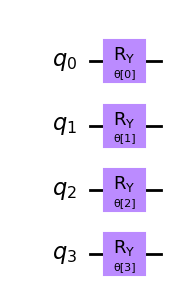

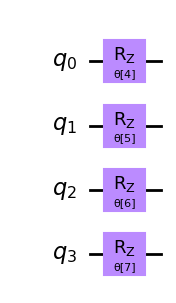

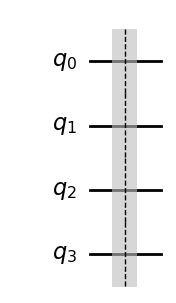

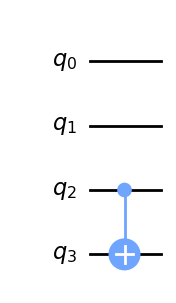

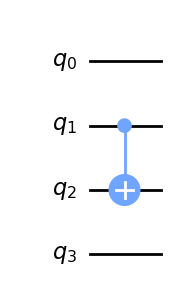

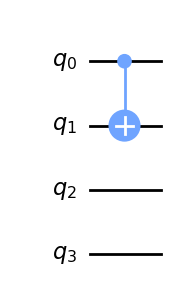

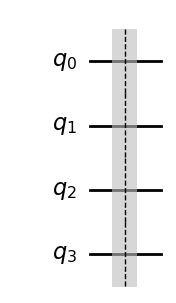

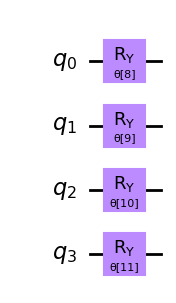

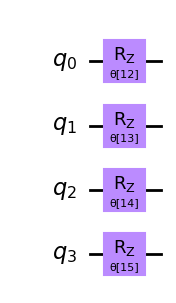

In [146]:
from qiskit.converters import circuit_to_dag, dag_to_circuit
from IPython.display import display

dag = circuit_to_dag(ansatz)
for layer in dag.layers():
    layer_as_circuit = dag_to_circuit(layer['graph'])
    display(layer_as_circuit.draw('mpl'))

In [144]:
super_circuit = Separate_Circuit_Apart(ansatz)

for circuit in super_circuit:
    print(circuit)

     ┌──────────┐┌──────────┐
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[4]) ├
     ├──────────┤├──────────┤
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[5]) ├
     └──────────┘└──────────┘
q_2: ────────────────────────
                             
q_3: ────────────────────────
                             
                             
q_0: ────────────────────────
                             
q_1: ────────────────────────
     ┌──────────┐┌──────────┐
q_2: ┤ Ry(θ[2]) ├┤ Rz(θ[6]) ├
     ├──────────┤├──────────┤
q_3: ┤ Ry(θ[3]) ├┤ Rz(θ[7]) ├
     └──────────┘└──────────┘
                    
q_0: ────────────■──
               ┌─┴─┐
q_1: ───────■──┤ X ├
          ┌─┴─┐└───┘
q_2: ──■──┤ X ├─────
     ┌─┴─┐└───┘     
q_3: ┤ X ├──────────
     └───┘          
     ┌──────────┐┌───────────┐
q_0: ┤ Ry(θ[8]) ├┤ Rz(θ[12]) ├
     ├──────────┤├───────────┤
q_1: ┤ Ry(θ[9]) ├┤ Rz(θ[13]) ├
     └──────────┘└───────────┘
q_2: ─────────────────────────
                              
q_3: ─────────────────────────
                       

In [110]:
import numpy as np
initial_point = np.linspace(0, ansatz.num_parameters-1, ansatz.num_parameters)
qc = ansatz.assign_parameters(initial_point)
qc.draw()

┌───────┐                                                                 »
q_0: ┤ Ry(0) ├─────────────────────────────────────────────────────────────────»
     ├───────┤                                                                 »
q_1: ┤ Ry(1) ├───────────────────────────────────────────────────────────■─────»
     ├───────┤                                                         ┌─┴─┐   »
q_2: ┤ Ry(2) ├─────────────────────────────────────────────────■───────┤ X ├───»
     ├───────┤                                               ┌─┴─┐   ┌─┴───┴──┐»
q_3: ┤ Ry(3) ├───────────────────────────────────────■───────┤ X ├───┤ Ry(12) ├»
     ├───────┤                                     ┌─┴─┐   ┌─┴───┴──┐└────────┘»
q_4: ┤ Ry(4) ├─────────────────────────────■───────┤ X ├───┤ Ry(13) ├──────────»
     ├───────┤                           ┌─┴─┐   ┌─┴───┴──┐└────────┘          »
q_5: ┤ Ry(5) ├───────────────────■───────┤ X ├───┤ Ry(14) ├────────────────────»
     ├───────┤                 ┌─┴─┐   ┌─┴───┴──┐└────────┘                    »
q_6: ┤ Ry(6) ├─────────■───────┤ X ├───┤ Ry(15) ├──────────────────────────────»
     ├───────┤       ┌─┴─┐   ┌─┴───┴──┐└────────┘                              »
q_7: ┤ Ry(7) ├──■────┤ X ├───┤ Ry(16) ├────────────────────────────────────────»
     ├───────┤┌─┴─┐┌─┴───┴──┐└────────┘                                        »
q_8: ┤ Ry(8) ├┤ X ├┤ Ry(17) ├──────────────────────────────────────────────────»
     └───────┘└───┘└────────┘                                                  »
«               ┌───────┐ 
«q_0: ────■─────┤ Ry(9) ├─
«       ┌─┴─┐   ├───────┴┐
«q_1: ──┤ X ├───┤ Ry(10) ├
«     ┌─┴───┴──┐└────────┘
«q_2: ┤ Ry(11) ├──────────
«     └────────┘          
«q_3: ────────────────────
«                         
«q_4: ────────────────────
«                         
«q_5: ────────────────────
«                         
«q_6: ────────────────────
«                         
«q_7: ────────────────────
«                         
«q_8: ────────────────────
«

In [87]:
print(initial_point)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23.]


In [98]:
number_qubit = 9
ansatz = Customize_RealAmplidues(number_qubit,1)
initial_point = np.linspace(0, ansatz.num_parameters-1, ansatz.num_parameters)
qc = ansatz.bind_parameters({theta: initial_point[i] for i, theta in enumerate(ansatz.parameters)})
qc.draw()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4180\1092725266.py:4: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  qc = ansatz.bind_parameters({theta: initial_point[i] for i, theta in enumerate(ansatz.parameters)})


┌───────┐  ░                                          ░ ┌────────┐
q_0: ┤ Ry(0) ├──░───■──────────────────────────────────────░─┤ Ry(17) ├
     ├───────┤  ░ ┌─┴─┐                                    ░ ├───────┬┘
q_1: ┤ Ry(9) ├──░─┤ X ├──■─────────────────────────────────░─┤ Ry(1) ├─
     ├───────┴┐ ░ └───┘┌─┴─┐                               ░ ├───────┤ 
q_2: ┤ Ry(10) ├─░──────┤ X ├──■────────────────────────────░─┤ Ry(2) ├─
     ├────────┤ ░      └───┘┌─┴─┐                          ░ ├───────┤ 
q_3: ┤ Ry(11) ├─░───────────┤ X ├──■───────────────────────░─┤ Ry(3) ├─
     ├────────┤ ░           └───┘┌─┴─┐                     ░ ├───────┤ 
q_4: ┤ Ry(12) ├─░────────────────┤ X ├──■──────────────────░─┤ Ry(4) ├─
     ├────────┤ ░                └───┘┌─┴─┐                ░ ├───────┤ 
q_5: ┤ Ry(13) ├─░─────────────────────┤ X ├──■─────────────░─┤ Ry(5) ├─
     ├────────┤ ░                     └───┘┌─┴─┐           ░ ├───────┤ 
q_6: ┤ Ry(14) ├─░──────────────────────────┤ X ├──■────────░─┤ Ry(6) ├─
     ├────────┤ ░                          └───┘┌─┴─┐      ░ ├───────┤ 
q_7: ┤ Ry(15) ├─░───────────────────────────────┤ X ├──■───░─┤ Ry(7) ├─
     ├────────┤ ░                               └───┘┌─┴─┐ ░ ├───────┤ 
q_8: ┤ Ry(16) ├─░────────────────────────────────────┤ X ├─░─┤ Ry(8) ├─
     └────────┘ ░                                    └───┘ ░ └───────┘

In [80]:
import numpy as np
initial_point = np.linspace(0,11,12) + 0j
print(initial_point)

[ 0.+0.j  1.+0.j  2.+0.j  3.+0.j  4.+0.j  5.+0.j  6.+0.j  7.+0.j  8.+0.j
  9.+0.j 10.+0.j 11.+0.j]


In [81]:
qc = ansatz.assign_parameters(initial_point)
qc.draw()

┌───────┐ ░            ░ ┌───────┐ ░            ░ ┌───────┐  ░           »
q_0: ┤ Ry(0) ├─░───■────────░─┤ Ry(5) ├─░───■────────░─┤ Ry(8) ├──░───■───────»
     ├───────┤ ░ ┌─┴─┐      ░ ├───────┤ ░ ┌─┴─┐      ░ ├───────┤  ░ ┌─┴─┐     »
q_1: ┤ Ry(3) ├─░─┤ X ├──■───░─┤ Ry(6) ├─░─┤ X ├──■───░─┤ Ry(9) ├──░─┤ X ├──■──»
     ├───────┤ ░ └───┘┌─┴─┐ ░ ├───────┤ ░ └───┘┌─┴─┐ ░ ├───────┴┐ ░ └───┘┌─┴─┐»
q_2: ┤ Ry(4) ├─░──────┤ X ├─░─┤ Ry(7) ├─░──────┤ X ├─░─┤ Ry(10) ├─░──────┤ X ├»
     └───────┘ ░      └───┘ ░ └───────┘ ░      └───┘ ░ └────────┘ ░      └───┘»
«      ░ ┌────────┐
«q_0: ─░─┤ Ry(11) ├
«      ░ ├───────┬┘
«q_1: ─░─┤ Ry(1) ├─
«      ░ ├───────┤ 
«q_2: ─░─┤ Ry(2) ├─
«      ░ └───────┘

In [ ]:
qc.draw()

In [6]:
steps = 100
init_params = np.array([[-0.5]*2*24][0], requires_grad=True)

drawer = qml.draw(circuit)
params = init_params
print(drawer(params))
# dev._circuit.draw()

 0: ──RY(-0.50)──RZ(-0.50)─────────────────────────────────────────────────────────────────────
 1: ──RY(-0.50)──RZ(-0.50)─────────────────────────────────────────────────────────────────────
 2: ──RY(-0.50)──RZ(-0.50)─────────────────────────────────────────────────────────────────────
 3: ──RY(-0.50)──RZ(-0.50)─────────────────────────────────────────────────────────────────────
 4: ──RY(-0.50)──RZ(-0.50)───────────────────────────────────────────────────────────╭●────────
 5: ──RY(-0.50)──RZ(-0.50)────────────────────────────────────────────────╭●─────────╰X────────
 6: ──RY(-0.50)──RZ(-0.50)─────────────────────────────────────╭●─────────╰X──────────RY(-0.50)
 7: ──RY(-0.50)──RZ(-0.50)──────────────────────────╭●─────────╰X──────────RY(-0.50)──RZ(-0.50)
 8: ──RY(-0.50)──RZ(-0.50)───────────────╭●─────────╰X──────────RY(-0.50)──RZ(-0.50)───────────
 9: ──RY(-0.50)──RZ(-0.50)────╭●─────────╰X──────────RY(-0.50)──RZ(-0.50)──────────────────────
10: ──RY(-0.50)──RZ(-0.50)─╭●─╰X────────

In [7]:
qng_cost = []
opt = qml.QNGOptimizer(0.01)

theta = init_params
for _ in range(steps):
    print(theta)
    print(circuit(theta))
    qng_cost.append(circuit(theta))
    theta = opt.step(circuit, theta)
    
    

[-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5
 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5
 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5
 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
2.3901426789892746
[-0.50227573 -0.49350864 -0.49532131 -0.49531024 -0.49533656 -0.49527399
 -0.49542271 -0.49506922 -0.4959094  -0.49391247 -0.50732616 -0.44684823
 -0.50918505 -0.50921863 -0.5091431  -0.5093226  -0.50889597 -0.50990999
 -0.50749989 -0.51322819 -0.49961322 -0.53197314 -0.45505881 -0.62660846
 -0.43524044 -0.45252424 -0.44932851 -0.44740302 -0.44947359 -0.44842998
 -0.44840993 -0.44939214 -0.44776993 -0.44837022 -0.45435144 -0.42827965
 -0.53555872 -0.51964876 -0.51931743 -0.52169545 -0.52061801 -0.52069355
 -0.52134234 -0.51982594 -0.52175532 -0.52403833 -0.50291174 -0.5534009 ]
0.6807322375674145
[-0.49976224 -0.48385333 -0.48764186 -0.48751153 -0.48758675 -0.48746897
 -0.48774156 -0.48709246 -0.48861933 -0.48441199 -0.5083901

In [36]:
gd_cost = []
opt = qml.GradientDescentOptimizer(0.01)

theta = init_params
for _ in range(steps):
    theta = opt.step(circuit, theta)
    gd_cost.append(circuit(theta))
    print(circuit(theta))

-2.5161093443589544
-2.9030242212718576
-3.276375804304855
-3.635363864900181
-3.979443519485843
-4.308305398429605
-4.621850320794692
-4.920160825353214
-5.203471611431499
-5.472140540457427
-5.726621412986155
-5.967439320978075
-6.19516901569746
-6.4104164443802585
-6.613803396626439
-6.805955058085104
-6.987490183320379
-7.159013558988151
-7.32111042027027
-7.474342497178945
-7.619245394247376
-7.756327040791375
-7.886066984800267
-8.008916338599043
-8.125298216925216
-8.235608537058916
-8.340217075804473
-8.4394686994937
-8.533684701034812
-8.623164192747836
-8.708185515725066
-8.789007636147238
-8.865871506753315
-8.939001377841606
-9.008606047062468
-9.074880041093282
-9.13800472526631
-9.19814933951739
-9.255471960771697
-9.310120393193774
-9.362232988688733
-9.41193940072365
-9.459361274998674
-9.504612880783025
-9.547801686880078
-9.589028886227549
-9.628389873098941
-9.665974676770414
-9.70186835536942
-9.736151353441633
-9.768899826570298
-9.80018593616719
-9.830078117332574

C:\Users\DELL\AppData\Local\Temp\ipykernel_4180\1639248915.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


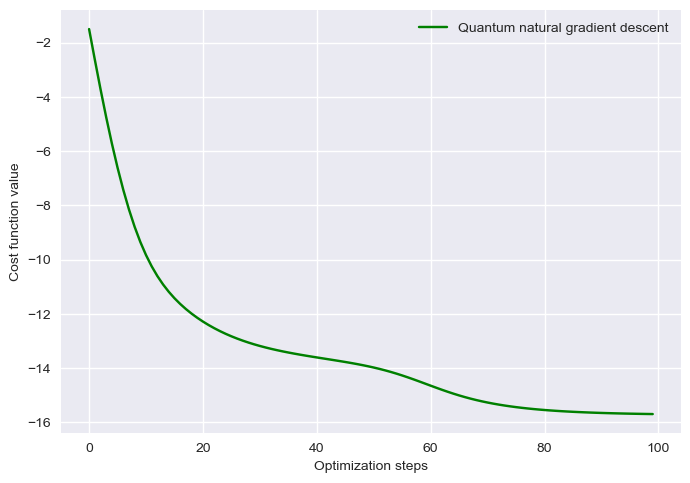

In [40]:
from matplotlib import pyplot as plt

plt.style.use("seaborn")
# plt.plot(gd_cost, "b", label="Vanilla gradient descent")
plt.plot(qng_cost, "g", label="Quantum natural gradient descent")

plt.ylabel("Cost function value")
plt.xlabel("Optimization steps")
plt.legend()
plt.show()

# Test 

In [3]:
ansatz = Customize_RealAmplidues(5,1)
print(ansatz)

     ┌─────────────────┐ ░                      ░ ┌─────────────────┐
q_0: ┤ Ry($\theta[0]$) ├─░───■──────────────────░─┤ Ry($\theta[5]$) ├
     ├─────────────────┤ ░ ┌─┴─┐                ░ ├─────────────────┤
q_1: ┤ Ry($\theta[1]$) ├─░─┤ X ├──■─────────────░─┤ Ry($\theta[6]$) ├
     ├─────────────────┤ ░ └───┘┌─┴─┐           ░ ├─────────────────┤
q_2: ┤ Ry($\theta[2]$) ├─░──────┤ X ├──■────────░─┤ Ry($\theta[7]$) ├
     ├─────────────────┤ ░      └───┘┌─┴─┐      ░ ├─────────────────┤
q_3: ┤ Ry($\theta[3]$) ├─░───────────┤ X ├──■───░─┤ Ry($\theta[8]$) ├
     ├─────────────────┤ ░           └───┘┌─┴─┐ ░ ├─────────────────┤
q_4: ┤ Ry($\theta[4]$) ├─░────────────────┤ X ├─░─┤ Ry($\theta[9]$) ├
     └─────────────────┘ ░                └───┘ ░ └─────────────────┘


In [16]:
from qiskit.primitives import Sampler
import numpy as np


sampler = Sampler()
shots = None
learning_rate = 0.01
operator = Ising_hamiltonian(5,1,2)
grad = np.zeros(ansatz.num_parameters)      
internal_initial_point = np.zeros(ansatz.num_parameters)-0.5
for i in range(ansatz.num_parameters):
    plus_parameter = internal_initial_point.copy()
    plus_parameter[i] += np.pi/2
    minus_parameter = internal_initial_point.copy()
    minus_parameter[i] -= np.pi/2
    grad[i] = (learning_rate)*(Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: plus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler) - Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: minus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler))/2

print(grad)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18984\3292683753.py:16: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  grad[i] = (learning_rate)*(Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: plus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler) - Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: minus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler))/2


[ 0.02628627  0.02393613  0.02310277  0.01657824 -0.01521011 -0.0227879
 -0.02002522 -0.01851081 -0.01919901 -0.01863795]


In [28]:
interation = 1000
khong_biet_dat_ten_gi = []

grad_SPSA = []

for k in range(interation):
    random = np.array([np.random.choice([-1,1]) for _ in range(ansatz.num_parameters)])
    ck = 0.01
    ak = learning_rate
    grad_SPSA_initial = np.zeros(ansatz.num_parameters) 
    plus_parameter = np.array(internal_initial_point.copy())
    plus_parameter = np.add(plus_parameter,random*ck)
    minus_parameter = np.array(internal_initial_point.copy())
    minus_parameter = np.subtract(minus_parameter,random*ck)
    grad_func = ak*(Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: plus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler) - Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: minus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler)) / (2*ck)

    grad_SPSA_initial = np.add(grad_SPSA_initial, grad_func*random)
    grad_SPSA.append(grad_SPSA_initial)
    khong_biet_dat_ten_gi.append(np.linalg.norm(grad - np.array(np.mean(grad_SPSA, axis=0))))

C:\Users\DELL\AppData\Local\Temp\ipykernel_18984\3944235347.py:15: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  grad_func = ak*(Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: plus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler) - Transverse_Ising_Measurement(operator, ansatz.bind_parameters({theta: minus_parameter[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler)) / (2*ck)


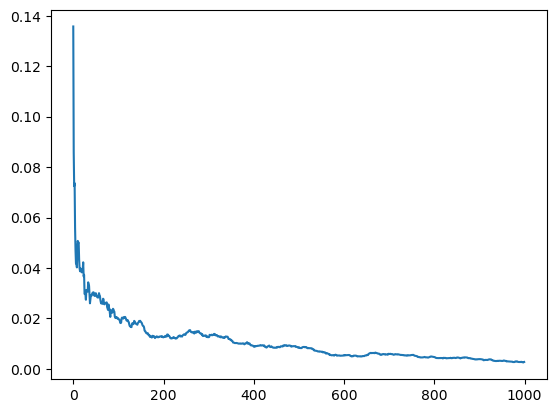

In [29]:
import matplotlib.pyplot as plt
plt.plot(khong_biet_dat_ten_gi)

QNSPSA - QNPSR

In [20]:
from qiskit.circuit.library import RealAmplitudes, EfficientSU2
from CoreVQEModified import Separate_Circuit_Apart
ansatz = RealAmplitudes(12, entanglement='reverse_linear', reps=1, insert_barriers=True).decompose()

super_circuit = Separate_Circuit_Apart(ansatz)

In [24]:
print(super_circuit[3])

IndexError: list index out of range

In [35]:
from qiskit import QuantumCircuit
super_circuit = Separate_Circuit_Apart(ansatz)
fubini_study_metric = np.zeros((ansatz.num_parameters, ansatz.num_parameters))
# Measure the fubini-study metric
for i in range(len(super_circuit)):
    if super_circuit[i][0].operation.params:
        g_internal = [[[] for _ in range(super_circuit[i].num_parameters)] for _ in range(super_circuit[i].num_parameters)]
        internal_circuit = QuantumCircuit(super_circuit[i].num_qubits)

        parameter_previous = 0
        for j in range(i):
            parameter_previous += super_circuit[j].num_parameters
            internal_circuit = internal_circuit.compose(super_circuit[j])
        # print(parameter_previous)
        

        internal_circuit = internal_circuit.bind_parameters({theta: internal_initial_point[i] for i, theta in enumerate(internal_circuit.parameters)})
        
        # Add string
        string = ['I']*ansatz.num_qubits

        for l in range(super_circuit[i].num_parameters):
            if super_circuit[i][l].operation.name == 'rx':
                string[l] = 'X'
            if super_circuit[i][l].operation.name == 'ry':
                string[l] = 'Y'
            if super_circuit[i][l].operation.name == 'rz':
                string[l] = 'Z'

        quantum_circuit_to_meausurement = QuantumCircuit(ansatz.num_qubits)

        for l in range(len(string)):
            if string[l] == "X":
                quantum_circuit_to_meausurement.h(l)
            if string[l] == "Y":
                quantum_circuit_to_meausurement.rx(np.pi/2, l)
            
        
        quantum_circuit = internal_circuit.compose(quantum_circuit_to_meausurement)
        quantum_circuit.measure_all()
        # print('string: ', string)
        # print(quantum_circuit)
        job = sampler.run(quantum_circuit, shots = shots)

        result = (job.result().quasi_dists[0].binary_probabilities())
        # print(result)
        # term 2 in fubini-study
        term2 = np.zeros(len(string))
        for l in range(super_circuit[i].num_parameters):
            expectation_value = 0
            position_of_non_I_gate = [(ansatz.num_qubits - 1) - l]
            for m in range(len(result)):
                extra_minus = 1
                for n in range(len(position_of_non_I_gate)):
                    if (list(result.keys()))[m][position_of_non_I_gate[n]] == '1':
                        extra_minus *= -1
                expectation_value += result[list(result.keys())[m]]*extra_minus
            term2[l] = expectation_value

        # print('term2:', term2)
        
        
        for l in range(super_circuit[i].num_parameters):
            for m in range(l, super_circuit[i].num_parameters):
                if l == m:
                    fubini_study_metric[l + parameter_previous, l + parameter_previous] = (1 - term2[l]**2)/4
                else:

                    term1_lm = 0
                    position_of_non_I_gate = [(ansatz.num_qubits - 1) - l, (ansatz.num_qubits - 1) - m]
                    for h in range(len(result)):
                        extra_minus = 1
                        for n in range(len(position_of_non_I_gate)):
                            if (list(result.keys()))[h][position_of_non_I_gate[n]] == '1':
                                extra_minus *= -1
                        term1_lm += result[list(result.keys())[h]]*extra_minus
                    
                    fubini_study_metric[l + parameter_previous, m + parameter_previous] = (term1_lm - term2[l]*term2[m])/4
                    fubini_study_metric[m + parameter_previous, l + parameter_previous] = fubini_study_metric[l + parameter_previous, m + parameter_previous]
        # print(fubini_study_metric)
        # print(internal_circuit)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18984\1114993365.py:17: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  internal_circuit = internal_circuit.bind_parameters({theta: internal_initial_point[i] for i, theta in enumerate(internal_circuit.parameters)})


In [36]:
fubini_study_metric

array([[ 2.50000000e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  2.50000000e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  2.50000000e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.50000000e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.50000000e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.

In [52]:
interation = 1000
khong_biet_dat_ten_gi = []

fubini_matrix_SPSA = []
ck = 0.01
for k in range(interation):
    random1 = np.array([np.random.choice([-1,1]) for _ in range(ansatz.num_parameters)])
    random2 = np.array([np.random.choice([-1,1]) for _ in range(ansatz.num_parameters)])
    # random1 = np.array([1.0 for _ in range(ansatz.num_parameters)])
    # random2 = np.array([-1.0 for _ in range(ansatz.num_parameters)])
    initial_plus1_plus2 = np.add(internal_initial_point, np.add(ck*random1, ck*random2))
    initial_plus1 = np.add(internal_initial_point, ck*random1)
    initial_minus1_plus2 = np.subtract(internal_initial_point, np.subtract(ck*random1, ck*random2))
    initial_minus1 = np.subtract(internal_initial_point, ck*random1)

    ansatz_initial = ansatz.bind_parameters({theta: internal_initial_point[k] for k, theta in enumerate(ansatz.parameters)})  
    ansatz_plus1_plus2 = ansatz.bind_parameters({theta: initial_plus1_plus2[k] for k, theta in enumerate(ansatz.parameters)})  
    ansatz_plus1 = ansatz.bind_parameters({theta: initial_plus1[k] for k, theta in enumerate(ansatz.parameters)})  
    ansatz_minus1_plus2 = ansatz.bind_parameters({theta: initial_minus1_plus2[k] for k, theta in enumerate(ansatz.parameters)})  
    ansatz_minus1 =  ansatz.bind_parameters({theta: initial_minus1[k] for k, theta in enumerate(ansatz.parameters)})  

    deltaF = SwapTest(ansatz_initial, ansatz_plus1_plus2)[0] - SwapTest(ansatz_initial, ansatz_plus1)[0] - SwapTest(ansatz_initial, ansatz_minus1_plus2)[0] + SwapTest(ansatz_initial, ansatz_minus1)[0]
    # print(deltaF)
    # Fubini_matrix
    fubini_matrix_SPSA_initial = -1/2*(deltaF/(2*ck**2))*(np.array(np.array([random1]).T*random2) + np.array(np.array([random2]).T*random1))/2
    fubini_matrix_SPSA.append(fubini_matrix_SPSA_initial)
    khong_biet_dat_ten_gi.append(np.linalg.norm(fubini_study_metric - np.array(np.mean(fubini_matrix_SPSA_initial, axis=0))))

C:\Users\DELL\AppData\Local\Temp\ipykernel_18984\2158386695.py:16: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  ansatz_initial = ansatz.bind_parameters({theta: internal_initial_point[k] for k, theta in enumerate(ansatz.parameters)})
C:\Users\DELL\AppData\Local\Temp\ipykernel_18984\2158386695.py:17: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  ansatz_plus1_plus2 = ansatz.bind_parameters({theta: initial_plus1_plus2[k] for k, theta in enumerate(ansatz.parameters)})
C:\Users\DELL\AppData\Local\Temp\ipykernel_18984\2158386695.py:18: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_par

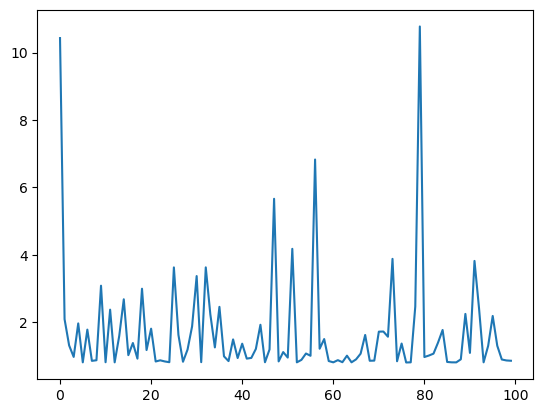

In [54]:
plt.plot(khong_biet_dat_ten_gi[0:100])

In [25]:
from CoreVQEModified import Transverse_Ising_Measurement, Ising_hamiltonian
from qiskit.primitives import Sampler
from CoreVQEModified import Customize_RealAmplidues, Customize_EfficientSU2
import numpy as np

qubit = 12

hamiltonian = Ising_hamiltonian(qubit, 1, 2)
shots = None 
sampler = Sampler()
ansatz = Customize_RealAmplidues(qubit, 1)
initial_point = np.zeros(ansatz.num_parameters) - 0.5
print(Transverse_Ising_Measurement(hamiltonian, ansatz.bind_parameters({theta: initial_point[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler))

C:\Users\DELL\AppData\Local\Temp\ipykernel_11688\593235476.py:13: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  print(Transverse_Ising_Measurement(hamiltonian, ansatz.bind_parameters({theta: initial_point[i] for i, theta in enumerate(ansatz.parameters)}), shots, sampler))


-6.4476662915535625


In [14]:
ansatz.num_qubits

13

In [27]:

sv = Statevector.from_label(f"{'0'*qubit}")
print(sv)
sv = sv.evolve(ansatz.bind_parameters({theta: initial_point[i] for i, theta in enumerate(ansatz.parameters)}))
print(sv.data)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2))
[ 0.53960248+0.j -0.08992333+0.j -0.07898017+0.j ... -0.00412063+0.j
 -0.11639621+0.j -0.08718714+0.j]


C:\Users\DELL\AppData\Local\Temp\ipykernel_11688\3392087643.py:3: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  sv = sv.evolve(ansatz.bind_parameters({theta: initial_point[i] for i, theta in enumerate(ansatz.parameters)}))


In [31]:
matrix_commute = np.array(hamiltonian.to_matrix())

vector = sv.data
vector_dagger = (vector.conjugate()).reshape(1, 2**qubit)
vector_normal = (vector).reshape(2**qubit,1)
result = (vector_dagger.dot(matrix_commute)).dot(vector_normal)
print((result)[0][0].real)

-6.4476662915535154


In [38]:
23.1/0.039519548416137695

584.5208491949058

In [37]:
from qiskit.primitives import Estimator, Sampler, BaseEstimator, BackendEstimator
import time
start_time = time.time()
print(Estimator().run(ansatz, hamiltonian, initial_point).result().values[0])
end_time = time.time()
print(end_time-start_time)


-6.447666291553516
0.039519548416137695
